In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches 
from pathlib import Path


In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

- hotel = restro H1 / City H2
- is canceled = 0-no / 1 - yes 
- lead time  = time elapsed upto arival 
- arrival_date_year 
- arrival_date_month
- arrival_date_week_number 
- arrival_date_day_of_month
- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- meals => sc/bb/hb/fb
- country = Country of origin. Categories are represented in the ISO 3155–3:2013 forma
- market segmet = In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators
- distribution_channel= Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking.
- previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type= Code of room type reserved. Code is presented instead of designation for anonymity reasons
- assigned_room_type = Code for the type of room assigned to the booking. Sometimes the assigned 
                        room type differs from the reserved room type due to hotel operation reasons 
                    (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- deposit_type

-deposit_type =  Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; 
    Refundable – a deposit was made with a value under the total cost of stay
- agent = ID of the travel agency that made the booking.
company

company =  ID of the company/entity that made the booking or responsible for paying the booking. 
                ID is presented instead of designation for anonymity reasons
- days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type

Type of booking, assuming one of four categories:

customer_type = Contract - when the booking has an allotment or other type of contract associated to it; Group – 
when the booking is associated to a group; Transient – 
when the booking is not part of a group or contract, and is not associated to other transient booking; 
Transient-party – when the booking is transient, but is associated to at least other transient booking
- adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces = Number of car parking spaces required by the customer

- total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)

-reservation_status = Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

- reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [4]:
#To get the columns name 
col_names = df.columns
for i in df.columns :
    print (i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [5]:
# Checking five point statistical summary 
df.describe().transpose()

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [6]:
df.info() # getting data types of all columns and presence of Null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- 119390 records are present in the given data set with 32 columns
- few columns like agent, company and children contains NAN values 

In [8]:
# seprating catagorical columns and numerical columns 
df_num = df.select_dtypes(include='int64')
df_cat = df.select_dtypes(include='object')
df_float = df.select_dtypes(include='float')
print ('Numerical columns ' , df_num.columns)
print ('catagotical columns ' , df_cat.columns)
print ('float columns ' , df_float.columns)

Numerical columns  Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
catagotical columns  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
float columns  Index(['children', 'agent', 'company', 'adr'], dtype='object')


In [9]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 4 columns):
children    119386 non-null float64
agent       103050 non-null float64
company     6797 non-null float64
adr         119390 non-null float64
dtypes: float64(4)
memory usage: 3.6 MB


In [10]:
df_float = df_float.fillna(-1)

In [197]:
df_float.isnull().sum()
# agent = ID of the travel agency that made the booking. company
#company = ID of the company/entity that made the booking or responsible for paying the booking.

children    0
agent       0
company     0
adr         0
dtype: int64

In [11]:
df_cat.describe()

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              21-10-2015  
freq         104641         89613              75166                    1461

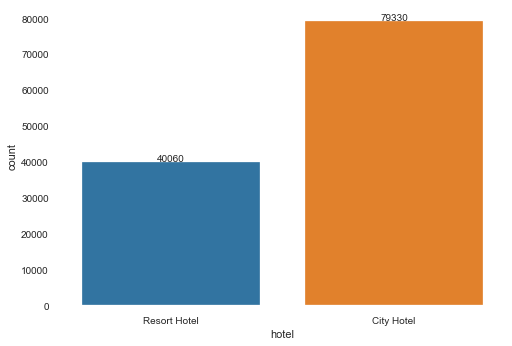

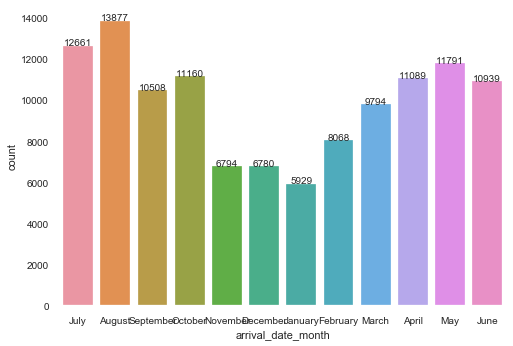

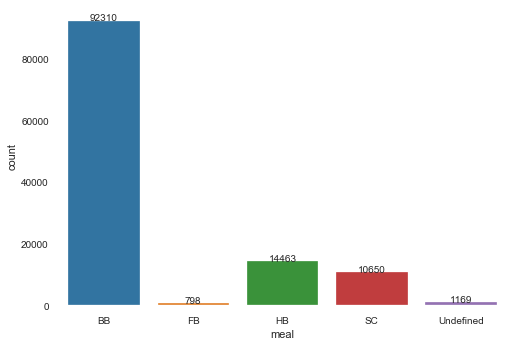

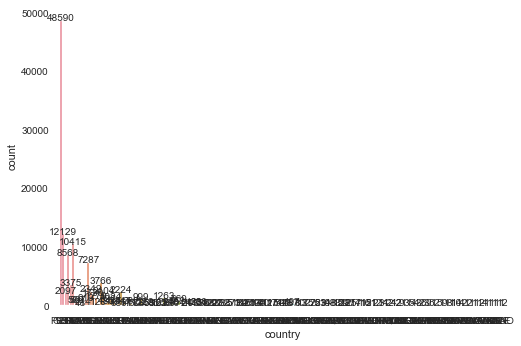

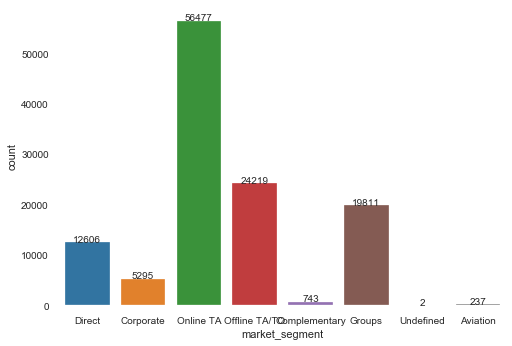

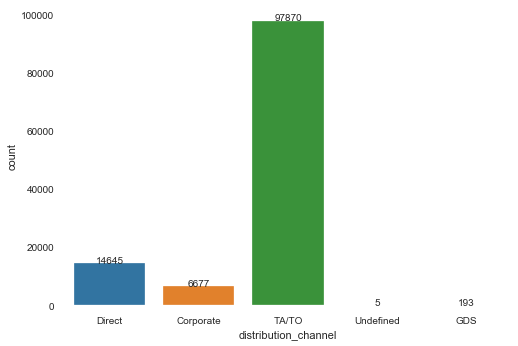

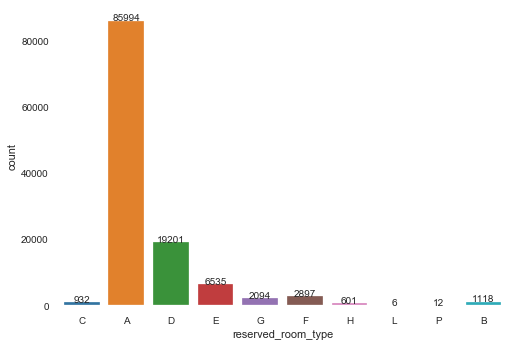

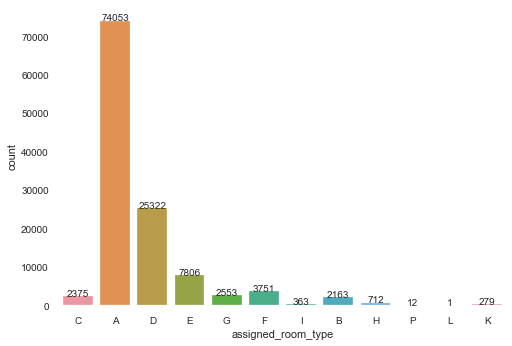

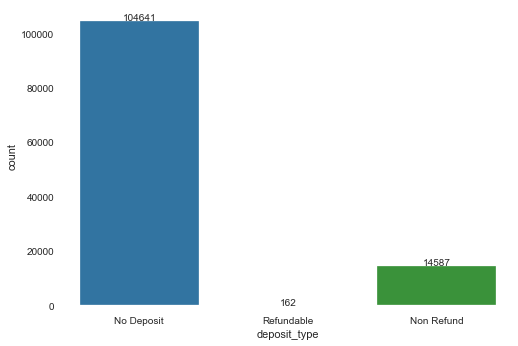

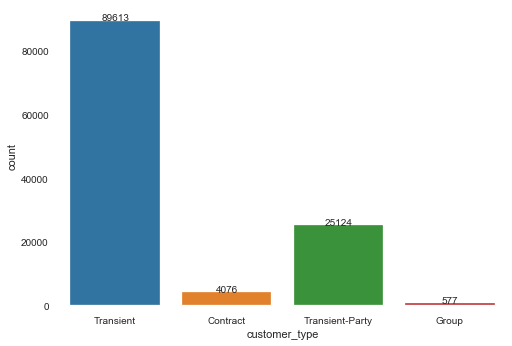

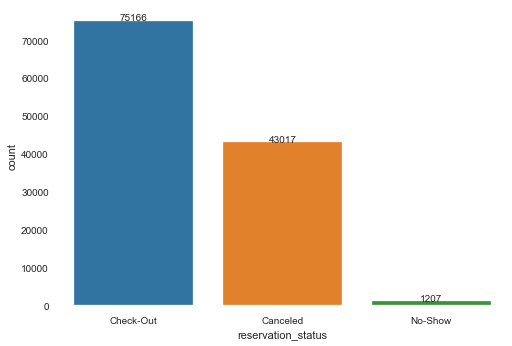

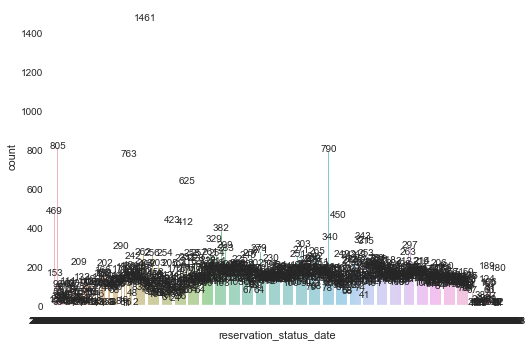

In [85]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/Cat_graphs/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_cat)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))
   
    

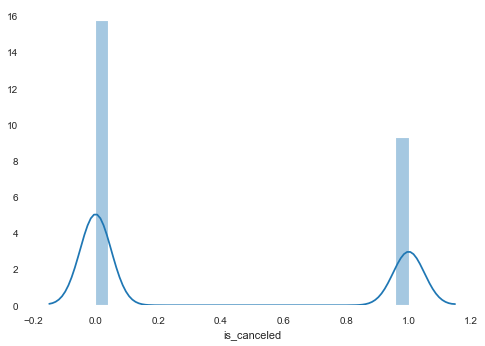

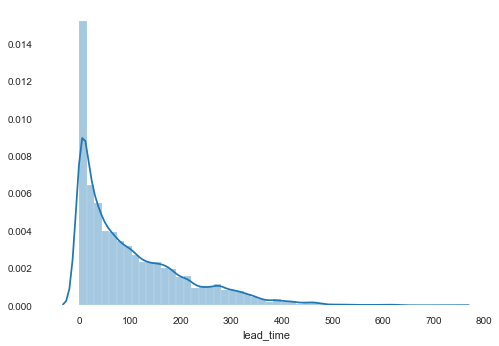

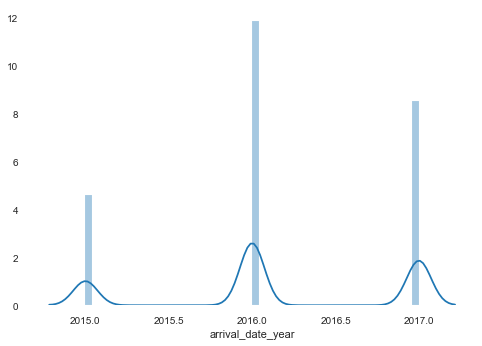

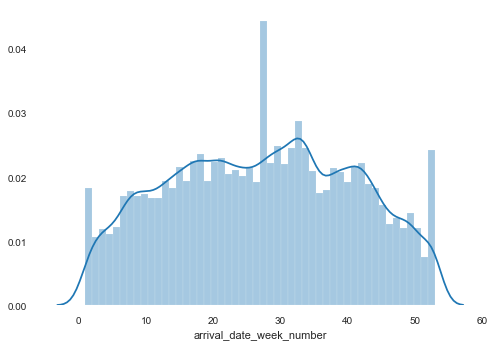

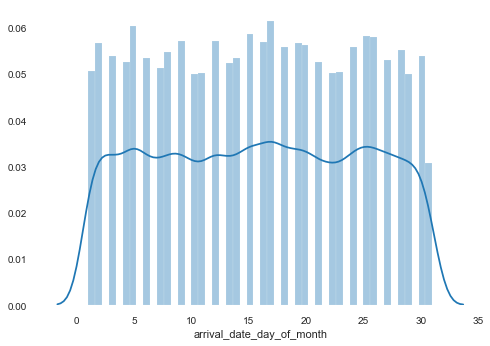

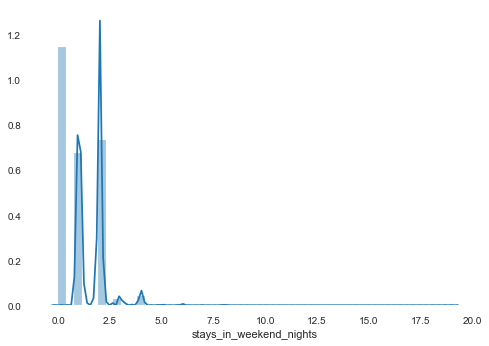

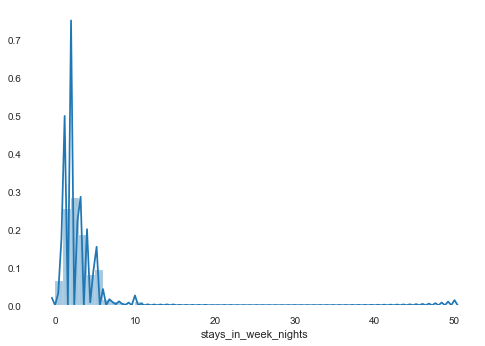

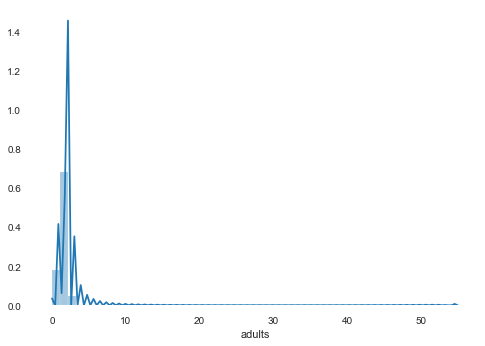

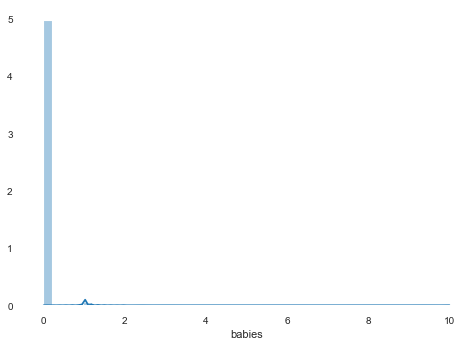

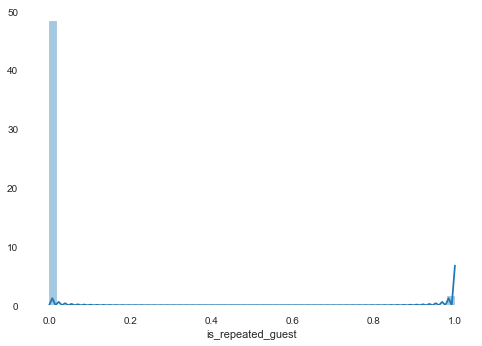

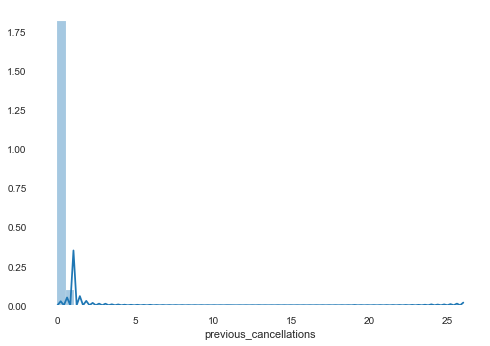

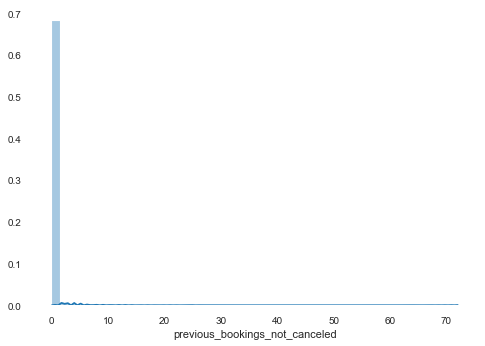

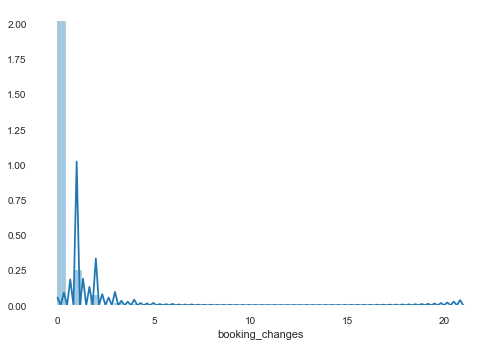

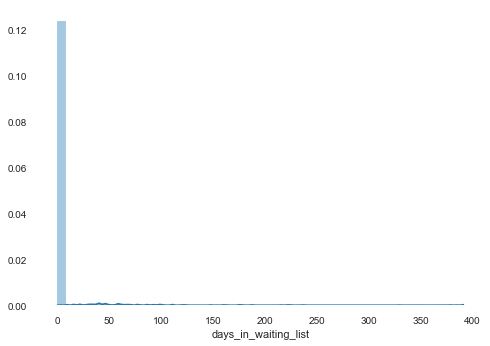

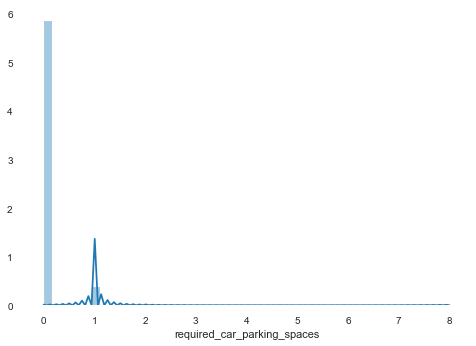

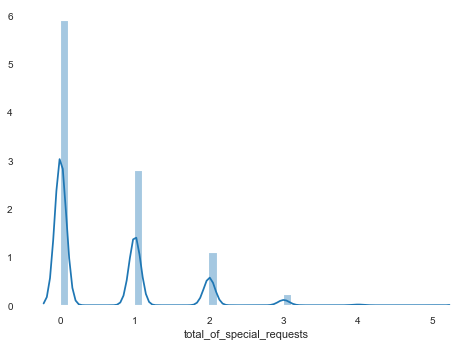

In [97]:
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_graphs/")
    #sns.countplot(x=col, data=df_cat)
    sns.distplot(df_num[col])
    plt.savefig(path/(col+'.jpg'))

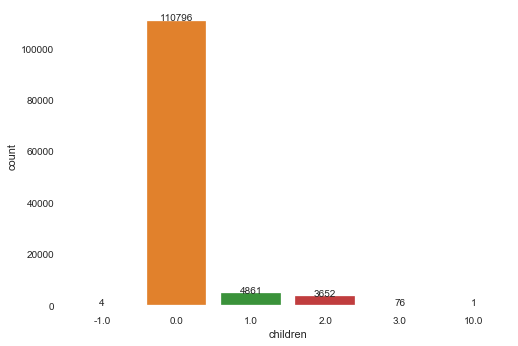

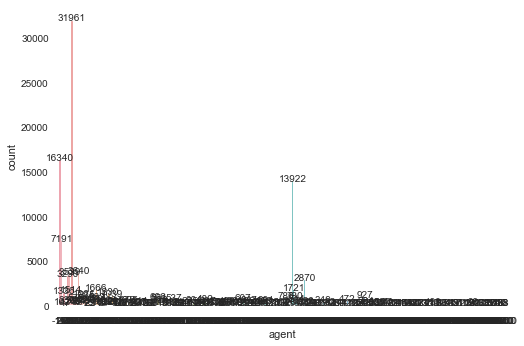

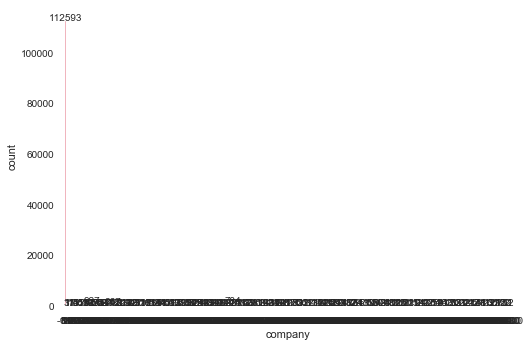

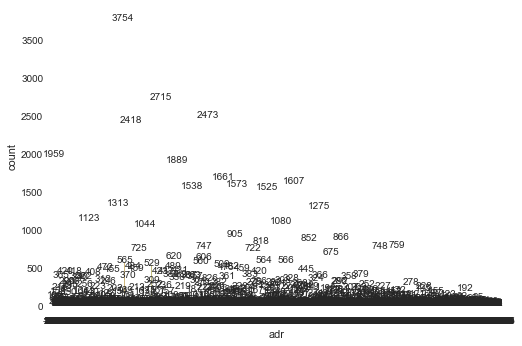

In [200]:
for i, col in enumerate(df_float.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_graphs/float/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_float)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))

In [9]:
import pandas_profiling
#df.profile_report()

In [12]:
# Seprating restro hotel 
df_h1 = df[df['hotel']== 'Resort Hotel']
print ('number rows means record ',df_h1.shape[0])
print ('number columns means Feature ',df_h1.shape[1])

number rows means record  40060
number columns means Feature  32


In [13]:
# seprating city hotel 
df_h2 = df[df.hotel=='City Hotel']
print ('number rows means record ',df_h2.shape[0])
print ('number columns means Feature ',df_h2.shape[1])

number rows means record  79330
number columns means Feature  32


In [14]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              01-07-2015  
1              01-07-2015  
2              02-07-2015  
3              02-07-2015  
4              03-07-2015  

[5 rows x 32 columns]

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


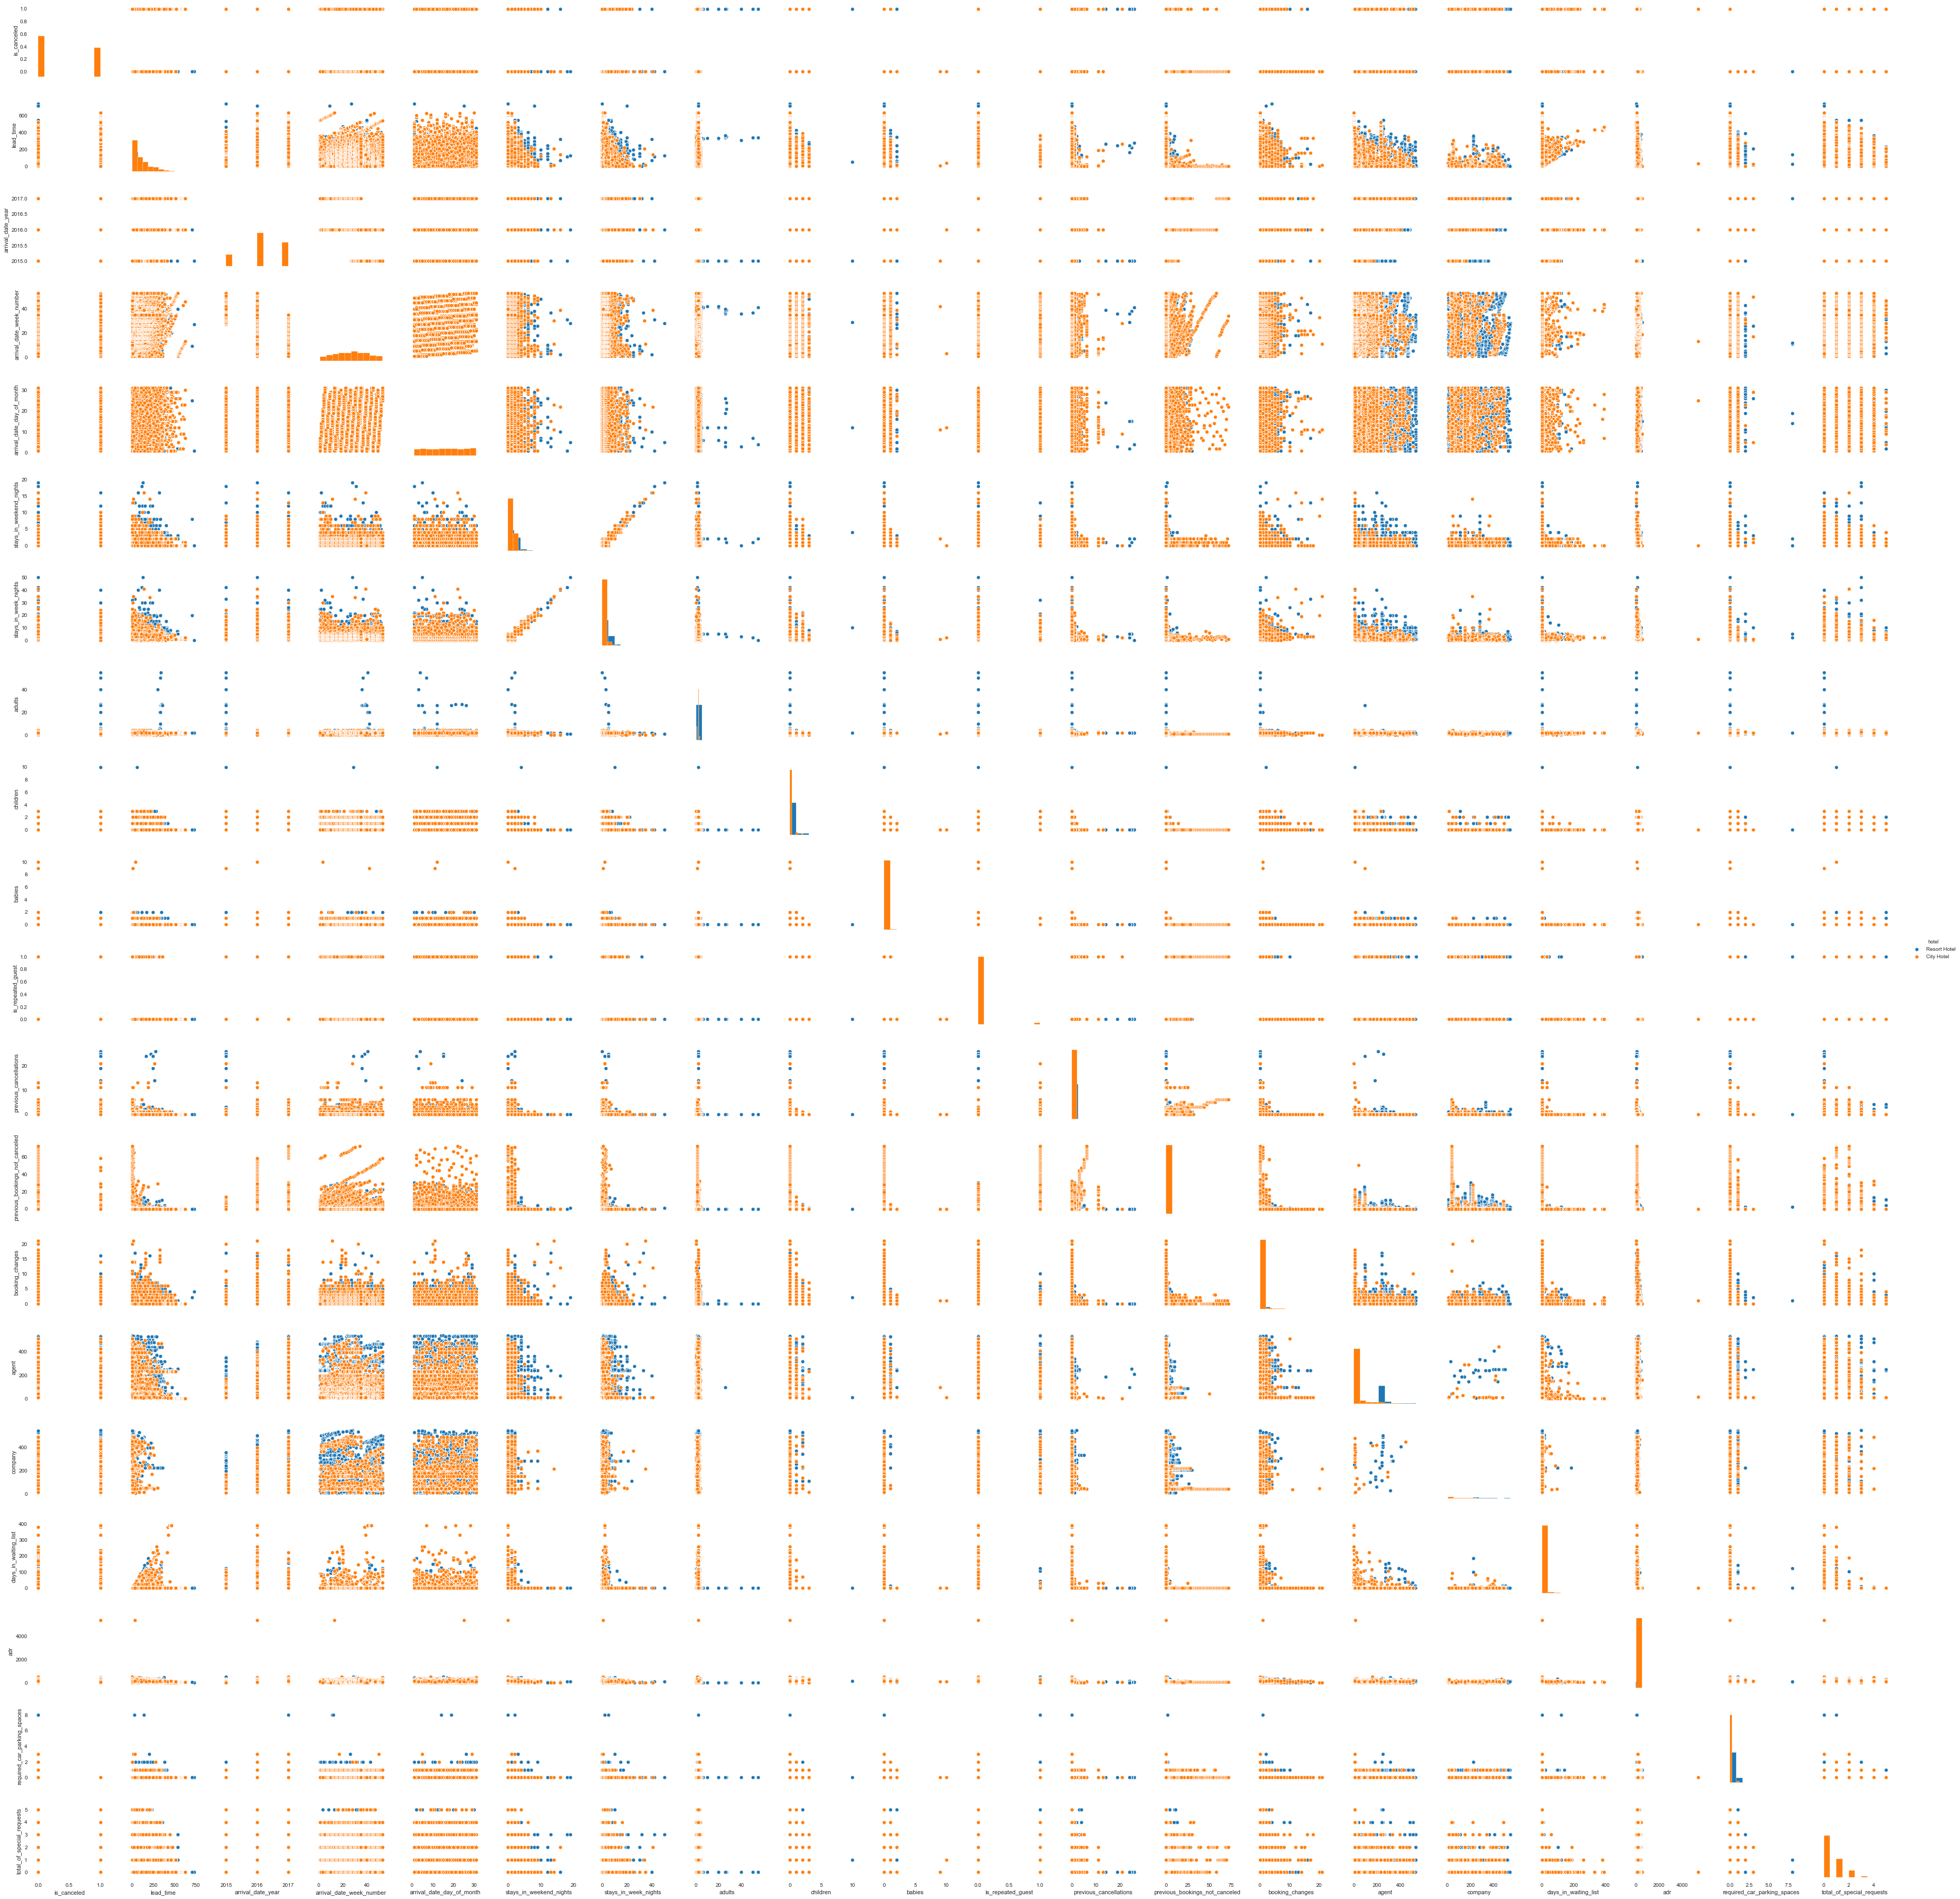

In [99]:
sns.pairplot(df,diag_kind= "hist", hue="hotel")
plt.savefig('pairplot.jpg')


In [100]:
df.groupby(["hotel"]).count()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
hotel                                                                         
City Hotel          79330      79330              79330               79330   
Resort Hotel        40060      40060              40060               40060   

              arrival_date_week_number  arrival_date_day_of_month  \
hotel                                                               
City Hotel                       79330                      79330   
Resort Hotel                     40060                      40060   

              stays_in_weekend_nights  stays_in_week_nights  adults  children  \
hotel                                                                           
City Hotel                      79330                 79330   79330     79326   
Resort Hotel                    40060                 40060   40060     40060   

              ...  deposit_type  agent  company  days_in_waiting_list  \
hotel         ...                                                       
City Hotel    ...         79330  71199     3689                 79330   
Resort Hotel  ...         40060  31851     3108                 40060   

              customer_type    adr  required_car_parking_spaces  \
hotel                                                             
City Hotel            79330  79330                        79330   
Resort Hotel          40060  40060                        40060   

              total_of_special_requests  reservation_status  \
hotel                                                         
City Hotel                        79330               79330   
Resort Hotel                      40060               40060   

              reservation_status_date  
hotel                                  
City Hotel                      79330  
Resort Hotel                    40060  

[2 rows x 31 columns]

In [15]:
frame = []
for i,col in enumerate(df.columns):
    fram = pd.DataFrame(df.groupby([col]).count())
    frame.append(fram)


In [222]:
frame[0]

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
hotel                                                                         
City Hotel          79330      79330              79330               79330   
Resort Hotel        40060      40060              40060               40060   

              arrival_date_week_number  arrival_date_day_of_month  \
hotel                                                               
City Hotel                       79330                      79330   
Resort Hotel                     40060                      40060   

              stays_in_weekend_nights  stays_in_week_nights  adults  children  \
hotel                                                                           
City Hotel                      79330                 79330   79330     79326   
Resort Hotel                    40060                 40060   40060     40060   

              ...  deposit_type  agent  company  days_in_waiting_list  \
hotel         ...                                                       
City Hotel    ...         79330  71199     3689                 79330   
Resort Hotel  ...         40060  31851     3108                 40060   

              customer_type    adr  required_car_parking_spaces  \
hotel                                                             
City Hotel            79330  79330                        79330   
Resort Hotel          40060  40060                        40060   

              total_of_special_requests  reservation_status  \
hotel                                                         
City Hotel                        79330               79330   
Resort Hotel                      40060               40060   

              reservation_status_date  
hotel                                  
City Hotel                      79330  
Resort Hotel                    40060  

[2 rows x 31 columns]

In [120]:
frame[1]

hotel  lead_time  arrival_date_year  arrival_date_month  \
is_canceled                                                            
0            75166      75166              75166               75166   
1            44224      44224              44224               44224   

             arrival_date_week_number  arrival_date_day_of_month  \
is_canceled                                                        
0                               75166                      75166   
1                               44224                      44224   

             stays_in_weekend_nights  stays_in_week_nights  adults  children  \
is_canceled                                                                    
0                              75166                 75166   75166     75166   
1                              44224                 44224   44224     44220   

             ...  deposit_type  agent  company  days_in_waiting_list  \
is_canceled  ...                                                       
0            ...         75166  62856     5606                 75166   
1            ...         44224  40194     1191                 44224   

             customer_type    adr  required_car_parking_spaces  \
is_canceled                                                      
0                    75166  75166                        75166   
1                    44224  44224                        44224   

             total_of_special_requests  reservation_status  \
is_canceled                                                  
0                                75166               75166   
1                                44224               44224   

             reservation_status_date  
is_canceled                           
0                              75166  
1                              44224  

[2 rows x 31 columns]

In [147]:
frame[15]

hotel  is_canceled  lead_time  arrival_date_year  \
distribution_channel                                                     
Corporate              6677         6677       6677               6677   
Direct                14645        14645      14645              14645   
GDS                     193          193        193                193   
TA/TO                 97870        97870      97870              97870   
Undefined                 5            5          5                  5   

                      arrival_date_month  arrival_date_week_number  \
distribution_channel                                                 
Corporate                           6677                      6677   
Direct                             14645                     14645   
GDS                                  193                       193   
TA/TO                              97870                     97870   
Undefined                              5                         5   

                      arrival_date_day_of_month  stays_in_weekend_nights  \
distribution_channel                                                       
Corporate                                  6677                     6677   
Direct                                    14645                    14645   
GDS                                         193                      193   
TA/TO                                     97870                    97870   
Undefined                                     5                        5   

                      stays_in_week_nights  adults  ...  deposit_type  agent  \
distribution_channel                                ...                        
Corporate                             6677    6677  ...          6677   1134   
Direct                               14645   14645  ...         14645   7020   
GDS                                    193     193  ...           193    191   
TA/TO                                97870   97870  ...         97870  94703   
Undefined                                5       5  ...             5      2   

                      company  days_in_waiting_list  customer_type    adr  \
distribution_channel                                                        
Corporate                5083                  6677           6677   6677   
Direct                    804                 14645          14645  14645   
GDS                         1                   193            193    193   
TA/TO                     909                 97870          97870  97870   
Undefined                   0                     5              5      5   

                      required_car_parking_spaces  total_of_special_requests  \
distribution_channel                                                           
Corporate                                    6677                       6677   
Direct                                      14645                      14645   
GDS                                           193                        193   
TA/TO                                       97870                      97870   
Undefined                                       5                          5   

                      reservation_status  reservation_status_date  
distribution_channel                                               
Corporate                           6677                     6677  
Direct                             14645                    14645  
GDS                                  193                      193  
TA/TO                              97870                    97870  
Undefined                              5                        5  

[5 rows x 31 columns]

In [122]:
frame[3]

hotel  is_canceled  lead_time  arrival_date_month  \
arrival_date_year                                                      
2015               21996        21996      21996               21996   
2016               56707        56707      56707               56707   
2017               40687        40687      40687               40687   

                   arrival_date_week_number  arrival_date_day_of_month  \
arrival_date_year                                                        
2015                                  21996                      21996   
2016                                  56707                      56707   
2017                                  40687                      40687   

                   stays_in_weekend_nights  stays_in_week_nights  adults  \
arrival_date_year                                                          
2015                                 21996                 21996   21996   
2016                                 56707                 56707   56707   
2017                                 40687                 40687   40687   

                   children  ...  deposit_type  agent  company  \
arrival_date_year            ...                                 
2015                  21992  ...         21996  18897     1305   
2016                  56707  ...         56707  49130     3182   
2017                  40687  ...         40687  35023     2310   

                   days_in_waiting_list  customer_type    adr  \
arrival_date_year                                               
2015                              21996          21996  21996   
2016                              56707          56707  56707   
2017                              40687          40687  40687   

                   required_car_parking_spaces  total_of_special_requests  \
arrival_date_year                                                           
2015                                     21996                      21996   
2016                                     56707                      56707   
2017                                     40687                      40687   

                   reservation_status  reservation_status_date  
arrival_date_year                                               
2015                            21996                    21996  
2016                            56707                    56707  
2017                            40687                    40687  

[3 rows x 31 columns]

In [146]:
frame[14]

hotel  is_canceled  lead_time  arrival_date_year  \
market_segment                                                     
Aviation          237          237        237                237   
Complementary     743          743        743                743   
Corporate        5295         5295       5295               5295   
Direct          12606        12606      12606              12606   
Groups          19811        19811      19811              19811   
Offline TA/TO   24219        24219      24219              24219   
Online TA       56477        56477      56477              56477   
Undefined           2            2          2                  2   

                arrival_date_month  arrival_date_week_number  \
market_segment                                                 
Aviation                       237                       237   
Complementary                  743                       743   
Corporate                     5295                      5295   
Direct                       12606                     12606   
Groups                       19811                     19811   
Offline TA/TO                24219                     24219   
Online TA                    56477                     56477   
Undefined                        2                         2   

                arrival_date_day_of_month  stays_in_weekend_nights  \
market_segment                                                       
Aviation                              237                      237   
Complementary                         743                      743   
Corporate                            5295                     5295   
Direct                              12606                    12606   
Groups                              19811                    19811   
Offline TA/TO                       24219                    24219   
Online TA                           56477                    56477   
Undefined                               2                        2   

                stays_in_week_nights  adults  ...  deposit_type  agent  \
market_segment                                ...                        
Aviation                         237     237  ...           237     25   
Complementary                    743     743  ...           743    103   
Corporate                       5295    5295  ...          5295    701   
Direct                         12606   12606  ...         12606   6599   
Groups                         19811   19811  ...         19811  15663   
Offline TA/TO                  24219   24219  ...         24219  23830   
Online TA                      56477   56477  ...         56477  56129   
Undefined                          2       2  ...             2      0   

                company  days_in_waiting_list  customer_type    adr  \
market_segment                                                        
Aviation            212                   237            237    237   
Complementary       313                   743            743    743   
Corporate          4471                  5295           5295   5295   
Direct              208                 12606          12606  12606   
Groups             1391                 19811          19811  19811   
Offline TA/TO       106                 24219          24219  24219   
Online TA            96                 56477          56477  56477   
Undefined             0                     2              2      2   

                required_car_parking_spaces  total_of_special_requests  \
market_segment                                                           
Aviation                                237                        237   
Complementary                           743                        743   
Corporate                              5295                       5295   
Direct                                12606                      12606   
Groups                                19811                      19811   
Offline TA/TO          

In [142]:
frame[12]

hotel  is_canceled  lead_time  arrival_date_year  \
meal                                                          
BB         92310        92310      92310              92310   
FB           798          798        798                798   
HB         14463        14463      14463              14463   
SC         10650        10650      10650              10650   
Undefined   1169         1169       1169               1169   

           arrival_date_month  arrival_date_week_number  \
meal                                                      
BB                      92310                     92310   
FB                        798                       798   
HB                      14463                     14463   
SC                      10650                     10650   
Undefined                1169                      1169   

           arrival_date_day_of_month  stays_in_weekend_nights  \
meal                                                            
BB                             92310                    92310   
FB                               798                      798   
HB                             14463                    14463   
SC                             10650                    10650   
Undefined                       1169                     1169   

           stays_in_week_nights  adults  ...  deposit_type  agent  company  \
meal                                     ...                                 
BB                        92310   92310  ...         92310  77781     6550   
FB                          798     798  ...           798    671       17   
HB                        14463   14463  ...         14463  13433      114   
SC                        10650   10650  ...         10650  10334       59   
Undefined                  1169    1169  ...          1169    831       57   

           days_in_waiting_list  customer_type    adr  \
meal                                                    
BB                        92310          92310  92310   
FB                          798            798    798   
HB                        14463          14463  14463   
SC                        10650          10650  10650   
Undefined                  1169           1169   1169   

           required_car_parking_spaces  total_of_special_requests  \
meal                                                                
BB                               92310                      92310   
FB                                 798                        798   
HB                               14463                      14463   
SC                               10650                      10650   
Undefined                         1169                       1169   

           reservation_status  reservation_status_date  
meal                                                    
BB                      92310                    92310  
FB                        798                      798  
HB                      14463                    14463  
SC                      10650                    10650  
Undefined                1169                     1169  

[5 rows x 31 columns]

In [149]:
frame[16]

hotel  is_canceled  lead_time  arrival_date_year  \
is_repeated_guest                                                      
0                  115580       115580     115580             115580   
1                    3810         3810       3810               3810   

                   arrival_date_month  arrival_date_week_number  \
is_repeated_guest                                                 
0                              115580                    115580   
1                                3810                      3810   

                   arrival_date_day_of_month  stays_in_weekend_nights  \
is_repeated_guest                                                       
0                                     115580                   115580   
1                                       3810                     3810   

                   stays_in_week_nights  adults  ...  deposit_type   agent  \
is_repeated_guest                                ...                         
0                                115580  115580  ...        115580  101605   
1                                  3810    3810  ...          3810    1445   

                   company  days_in_waiting_list  customer_type     adr  \
is_repeated_guest                                                         
0                     5127                115580         115580  115580   
1                     1670                  3810           3810    3810   

                   required_car_parking_spaces  total_of_special_requests  \
is_repeated_guest                                                           
0                                       115580                     115580   
1                                         3810                       3810   

                   reservation_status  reservation_status_date  
is_repeated_guest                                               
0                              115580                   115580  
1                                3810                     3810  

[2 rows x 31 columns]

In [150]:
frame[17]

hotel  is_canceled  lead_time  arrival_date_year  \
previous_cancellations                                                      
0                       112906       112906     112906             112906   
1                         6051         6051       6051               6051   
2                          116          116        116                116   
3                           65           65         65                 65   
4                           31           31         31                 31   
5                           19           19         19                 19   
6                           22           22         22                 22   
11                          35           35         35                 35   
13                          12           12         12                 12   
14                          14           14         14                 14   
19                          19           19         19                 19   
21                           1            1          1                  1   
24                          48           48         48                 48   
25                          25           25         25                 25   
26                          26           26         26                 26   

                        arrival_date_month  arrival_date_week_number  \
previous_cancellations                                                 
0                                   112906                    112906   
1                                     6051                      6051   
2                                      116                       116   
3                                       65                        65   
4                                       31                        31   
5                                       19                        19   
6                                       22                        22   
11                                      35                        35   
13                                      12                        12   
14                                      14                        14   
19                                      19                        19   
21                                       1                         1   
24                                      48                        48   
25                                      25                        25   
26                                      26                        26   

                        arrival_date_day_of_month  stays_in_weekend_nights  \
previous_cancellations                                                       
0                                          112906                   112906   
1                                            6051                     6051   
2                                             116                      116   
3                                              65                       65   
4                                              31                       31   
5                                              19                       19   
6                                              22                       22   
11                                             35                       35   
13                                             12                       12   
14                                             14                       14   
19                                             19                       19   
21                                              1                        1   
24                                             48                       48   
25                                             25                       25   
26                                             26                       26   

                        stays_in_week_nights  adults  ...  deposit_type  \
previous_cancellations                                ...                 
0            

In [151]:
frame[18]

hotel  is_canceled  lead_time  \
previous_bookings_not_canceled                                   
0                               115770       115770     115770   
1                                 1542         1542       1542   
2                                  580          580        580   
3                                  333          333        333   
4                                  229          229        229   
...                                ...          ...        ...   
68                                   1            1          1   
69                                   1            1          1   
70                                   1            1          1   
71                                   1            1          1   
72                                   1            1          1   

                                arrival_date_year  arrival_date_month  \
previous_bookings_not_canceled                                          
0                                          115770              115770   
1                                            1542                1542   
2                                             580                 580   
3                                             333                 333   
4                                             229                 229   
...                                           ...                 ...   
68                                              1                   1   
69                                              1                   1   
70                                              1                   1   
71                                              1                   1   
72                                              1                   1   

                                arrival_date_week_number  \
previous_bookings_not_canceled                             
0                                                 115770   
1                                                   1542   
2                                                    580   
3                                                    333   
4                                                    229   
...                                                  ...   
68                                                     1   
69                                                     1   
70                                                     1   
71                                                     1   
72                                                     1   

                                arrival_date_day_of_month  \
previous_bookings_not_canceled                              
0                                                  115770   
1                                                    1542   
2                                                     580   
3                                                     333   
4                                                     229   
...                                                   ...   
68                                                      1   
69                                                      1   
70                                                      1   
71                                                      1   
72                                                      1   

                                stays_in_weekend_nights  stays_in_week_nights  \
previous_bookings_not_canceled                                                  
0                                                115770                115770   
1                                                  1542                  1542   
2                                                   580                   580   
3                                                   333                   333   
4                                                   229                   229   
...                                                 ...                   ...   
6

In [152]:
frame[19]

hotel  is_canceled  lead_time  arrival_date_year  \
reserved_room_type                                                     
A                   85994        85994      85994              85994   
B                    1118         1118       1118               1118   
C                     932          932        932                932   
D                   19201        19201      19201              19201   
E                    6535         6535       6535               6535   
F                    2897         2897       2897               2897   
G                    2094         2094       2094               2094   
H                     601          601        601                601   
L                       6            6          6                  6   
P                      12           12         12                 12   

                    arrival_date_month  arrival_date_week_number  \
reserved_room_type                                                 
A                                85994                     85994   
B                                 1118                      1118   
C                                  932                       932   
D                                19201                     19201   
E                                 6535                      6535   
F                                 2897                      2897   
G                                 2094                      2094   
H                                  601                       601   
L                                    6                         6   
P                                   12                        12   

                    arrival_date_day_of_month  stays_in_weekend_nights  \
reserved_room_type                                                       
A                                       85994                    85994   
B                                        1118                     1118   
C                                         932                      932   
D                                       19201                    19201   
E                                        6535                     6535   
F                                        2897                     2897   
G                                        2094                     2094   
H                                         601                      601   
L                                           6                        6   
P                                          12                       12   

                    stays_in_week_nights  adults  ...  deposit_type  agent  \
reserved_room_type                                ...                        
A                                  85994   85994  ...         85994  73394   
B                                   1118    1118  ...          1118    994   
C                                    932     932  ...           932    765   
D                                  19201   19201  ...         19201  17548   
E                                   6535    6535  ...          6535   5465   
F                                   2897    2897  ...          2897   2539   
G                                   2094    2094  ...          2094   1811   
H                                    601     601  ...           601    534   
L                                      6       6  ...             6      0   
P                                     12      12  ...            12      0   

                    company  days_in_waiting_list  customer_type    adr  \
reserved_room_type                                                        
A                      6003                 85994          85994  85994   
B                        12                  1118           1118   1118   
C                        27                   932            932    932   
D                       483                 19201          19201  19201   
E                       200                  6535           65

In [154]:
frame[21]

hotel  is_canceled  lead_time  arrival_date_year  \
booking_changes                                                      
0                101314       101314     101314             101314   
1                 12701        12701      12701              12701   
2                  3805         3805       3805               3805   
3                   927          927        927                927   
4                   376          376        376                376   
5                   118          118        118                118   
6                    63           63         63                 63   
7                    31           31         31                 31   
8                    17           17         17                 17   
9                     8            8          8                  8   
10                    6            6          6                  6   
11                    2            2          2                  2   
12                    2            2          2                  2   
13                    5            5          5                  5   
14                    5            5          5                  5   
15                    3            3          3                  3   
16                    2            2          2                  2   
17                    2            2          2                  2   
18                    1            1          1                  1   
20                    1            1          1                  1   
21                    1            1          1                  1   

                 arrival_date_month  arrival_date_week_number  \
booking_changes                                                 
0                            101314                    101314   
1                             12701                     12701   
2                              3805                      3805   
3                               927                       927   
4                               376                       376   
5                               118                       118   
6                                63                        63   
7                                31                        31   
8                                17                        17   
9                                 8                         8   
10                                6                         6   
11                                2                         2   
12                                2                         2   
13                                5                         5   
14                                5                         5   
15                                3                         3   
16                                2                         2   
17                                2                         2   
18                                1                         1   
20                                1                         1   
21                                1                         1   

                 arrival_date_day_of_month  stays_in_weekend_nights  \
booking_changes                                                       
0                                   101314                   101314   
1                                    12701                    12701   
2                                     3805                     3805   
3                                      927                      927   
4                                      376                      376   
5                                      118                      118   
6                                       63                       63   
7                                       31                       31   
8                                       17                       17   
9                                        8                        8   
10                                       6                 

In [155]:
frame[22]

hotel  is_canceled  lead_time  arrival_date_year  \
deposit_type                                                      
No Deposit    104641       104641     104641             104641   
Non Refund     14587        14587      14587              14587   
Refundable       162          162        162                162   

              arrival_date_month  arrival_date_week_number  \
deposit_type                                                 
No Deposit                104641                    104641   
Non Refund                 14587                     14587   
Refundable                   162                       162   

              arrival_date_day_of_month  stays_in_weekend_nights  \
deposit_type                                                       
No Deposit                       104641                   104641   
Non Refund                        14587                    14587   
Refundable                          162                      162   

              stays_in_week_nights  adults  ...  booking_changes  agent  \
deposit_type                                ...                           
No Deposit                  104641  104641  ...           104641  90466   
Non Refund                   14587   14587  ...            14587  12536   
Refundable                     162     162  ...              162     48   

              company  days_in_waiting_list  customer_type     adr  \
deposit_type                                                         
No Deposit       6196                104641         104641  104641   
Non Refund        506                 14587          14587   14587   
Refundable         95                   162            162     162   

              required_car_parking_spaces  total_of_special_requests  \
deposit_type                                                           
No Deposit                         104641                     104641   
Non Refund                          14587                      14587   
Refundable                            162                        162   

              reservation_status  reservation_status_date  
deposit_type                                               
No Deposit                104641                   104641  
Non Refund                 14587                    14587  
Refundable                   162                      162  

[3 rows x 31 columns]

In [160]:
frame[25]

hotel  is_canceled  lead_time  arrival_date_year  \
days_in_waiting_list                                                      
0                     115692       115692     115692             115692   
1                         12           12         12                 12   
2                          5            5          5                  5   
3                         59           59         59                 59   
4                         25           25         25                 25   
...                      ...          ...        ...                ...   
236                       35           35         35                 35   
259                       10           10         10                 10   
330                       15           15         15                 15   
379                       15           15         15                 15   
391                       45           45         45                 45   

                      arrival_date_month  arrival_date_week_number  \
days_in_waiting_list                                                 
0                                 115692                    115692   
1                                     12                        12   
2                                      5                         5   
3                                     59                        59   
4                                     25                        25   
...                                  ...                       ...   
236                                   35                        35   
259                                   10                        10   
330                                   15                        15   
379                                   15                        15   
391                                   45                        45   

                      arrival_date_day_of_month  stays_in_weekend_nights  \
days_in_waiting_list                                                       
0                                        115692                   115692   
1                                            12                       12   
2                                             5                        5   
3                                            59                       59   
4                                            25                       25   
...                                         ...                      ...   
236                                          35                       35   
259                                          10                       10   
330                                          15                       15   
379                                          15                       15   
391                                          45                       45   

                      stays_in_week_nights  adults  ...  booking_changes  \
days_in_waiting_list                                ...                    
0                                   115692  115692  ...           115692   
1                                       12      12  ...               12   
2                                        5       5  ...                5   
3                                       59      59  ...               59   
4                                       25      25  ...               25   
...                                    ...     ...  ...              ...   
236                                     35      35  ...               35   
259                                     10      10  ...               10   
330                                     15      15  ...               15   
379                                     15      15  ...               15   
391                                     45      45  ...               45   

                      deposit_type  agent  company  customer_type     adr  \
days_in_waiting_list                                                        
0   

In [161]:
frame[26]

hotel  is_canceled  lead_time  arrival_date_year  \
customer_type                                                       
Contract          4076         4076       4076               4076   
Group              577          577        577                577   
Transient        89613        89613      89613              89613   
Transient-Party  25124        25124      25124              25124   

                 arrival_date_month  arrival_date_week_number  \
customer_type                                                   
Contract                       4076                      4076   
Group                           577                       577   
Transient                     89613                     89613   
Transient-Party               25124                     25124   

                 arrival_date_day_of_month  stays_in_weekend_nights  \
customer_type                                                         
Contract                              4076                     4076   
Group                                  577                      577   
Transient                            89613                    89613   
Transient-Party                      25124                    25124   

                 stays_in_week_nights  adults  ...  booking_changes  \
customer_type                                  ...                    
Contract                         4076    4076  ...             4076   
Group                             577     577  ...              577   
Transient                       89613   89613  ...            89613   
Transient-Party                 25124   25124  ...            25124   

                 deposit_type  agent  company  days_in_waiting_list    adr  \
customer_type                                                                
Contract                 4076   4063        5                  4076   4076   
Group                     577    478       49                   577    577   
Transient               89613  77884     4152                 89613  89613   
Transient-Party         25124  20625     2591                 25124  25124   

                 required_car_parking_spaces  total_of_special_requests  \
customer_type                                                             
Contract                                4076                       4076   
Group                                    577                        577   
Transient                              89613                      89613   
Transient-Party                        25124                      25124   

                 reservation_status  reservation_status_date  
customer_type                                                 
Contract                       4076                     4076  
Group                           577                      577  
Transient                     89613                    89613  
Transient-Party               25124                    25124  

[4 rows x 31 columns]

In [163]:
frame[28]

hotel  is_canceled  lead_time  \
required_car_parking_spaces                                   
0                            111974       111974     111974   
1                              7383         7383       7383   
2                                28           28         28   
3                                 3            3          3   
8                                 2            2          2   

                             arrival_date_year  arrival_date_month  \
required_car_parking_spaces                                          
0                                       111974              111974   
1                                         7383                7383   
2                                           28                  28   
3                                            3                   3   
8                                            2                   2   

                             arrival_date_week_number  \
required_car_parking_spaces                             
0                                              111974   
1                                                7383   
2                                                  28   
3                                                   3   
8                                                   2   

                             arrival_date_day_of_month  \
required_car_parking_spaces                              
0                                               111974   
1                                                 7383   
2                                                   28   
3                                                    3   
8                                                    2   

                             stays_in_weekend_nights  stays_in_week_nights  \
required_car_parking_spaces                                                  
0                                             111974                111974   
1                                               7383                  7383   
2                                                 28                    28   
3                                                  3                     3   
8                                                  2                     2   

                             adults  ...  booking_changes  deposit_type  \
required_car_parking_spaces          ...                                  
0                            111974  ...           111974        111974   
1                              7383  ...             7383          7383   
2                                28  ...               28            28   
3                                 3  ...                3             3   
8                                 2  ...                2             2   

                             agent  company  days_in_waiting_list  \
required_car_parking_spaces                                         
0                            97592     6037                111974   
1                             5435      756                  7383   
2                               20        4                    28   
3                                3        0                     3   
8                                0        0                     2   

                             customer_type     adr  total_of_special_requests  \
required_car_parking_spaces                                                     
0                                   111974  111974                     111974   
1                                     7383    7383                       7383   
2                                       28      28                         28   
3                                        3       3                          3   
8                                        2       2                          2   

                             reservation_status  reservation_status_date  
required_car_parking_spaces                                               
0              

In [164]:
frame[29]

hotel  is_canceled  lead_time  arrival_date_year  \
total_of_special_requests                                                     
0                          70318        70318      70318              70318   
1                          33226        33226      33226              33226   
2                          12969        12969      12969              12969   
3                           2497         2497       2497               2497   
4                            340          340        340                340   
5                             40           40         40                 40   

                           arrival_date_month  arrival_date_week_number  \
total_of_special_requests                                                 
0                                       70318                     70318   
1                                       33226                     33226   
2                                       12969                     12969   
3                                        2497                      2497   
4                                         340                       340   
5                                          40                        40   

                           arrival_date_day_of_month  stays_in_weekend_nights  \
total_of_special_requests                                                       
0                                              70318                    70318   
1                                              33226                    33226   
2                                              12969                    12969   
3                                               2497                     2497   
4                                                340                      340   
5                                                 40                       40   

                           stays_in_week_nights  adults  ...  booking_changes  \
total_of_special_requests                                ...                    
0                                         70318   70318  ...            70318   
1                                         33226   33226  ...            33226   
2                                         12969   12969  ...            12969   
3                                          2497    2497  ...             2497   
4                                           340     340  ...              340   
5                                            40      40  ...               40   

                           deposit_type  agent  company  days_in_waiting_list  \
total_of_special_requests                                                       
0                                 70318  58045     5526                 70318   
1                                 33226  30490      938                 33226   
2                                 12969  11981      253                 12969   
3                                  2497   2233       62                  2497   
4                                   340    272       18                   340   
5                                    40     29        0                    40   

                           customer_type    adr  required_car_parking_spaces  \
total_of_special_requests                                                      
0                                  70318  70318                        70318   
1                                  33226  33226                        33226   
2                                  12969  12969                        12969   
3                                   2497   2497                         2497   
4                                    340    340                          340   
5                                     40     40                           40   

                           reservation_status  reservation_status_date  
total_of_special_requests                                               
0                                       70318              

In [165]:
frame[30]

hotel  is_canceled  lead_time  arrival_date_year  \
reservation_status                                                     
Canceled            43017        43017      43017              43017   
Check-Out           75166        75166      75166              75166   
No-Show              1207         1207       1207               1207   

                    arrival_date_month  arrival_date_week_number  \
reservation_status                                                 
Canceled                         43017                     43017   
Check-Out                        75166                     75166   
No-Show                           1207                      1207   

                    arrival_date_day_of_month  stays_in_weekend_nights  \
reservation_status                                                       
Canceled                                43017                    43017   
Check-Out                               75166                    75166   
No-Show                                  1207                     1207   

                    stays_in_week_nights  adults  ...  booking_changes  \
reservation_status                                ...                    
Canceled                           43017   43017  ...            43017   
Check-Out                          75166   75166  ...            75166   
No-Show                             1207    1207  ...             1207   

                    deposit_type  agent  company  days_in_waiting_list  \
reservation_status                                                       
Canceled                   43017  39191     1093                 43017   
Check-Out                  75166  62856     5606                 75166   
No-Show                     1207   1003       98                  1207   

                    customer_type    adr  required_car_parking_spaces  \
reservation_status                                                      
Canceled                    43017  43017                        43017   
Check-Out                   75166  75166                        75166   
No-Show                      1207   1207                         1207   

                    total_of_special_requests  reservation_status_date  
reservation_status                                                      
Canceled                                43017                    43017  
Check-Out                               75166                    75166  
No-Show                                  1207                     1207  

[3 rows x 31 columns]

In [16]:
li = [0,1,3,15,14,12,16,17,18,19,21,22,25,26,28,29,30]

ha = df.columns[li]
    
for i in ha:
    print(i)
           

hotel
is_canceled
arrival_date_year
distribution_channel
market_segment
meal
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
booking_changes
deposit_type
days_in_waiting_list
customer_type
required_car_parking_spaces
total_of_special_requests
reservation_status


In [17]:
df_h1_num = df_h1[df_num.columns]
df_h1_cat = df_h1[df_cat.columns]
df_h1_float = df_h1[df_float.columns]

In [18]:
df_h2_num = df_h2[df_num.columns]
df_h2_cat = df_h2[df_cat.columns]
df_h2_float = df_h1[df_float.columns]

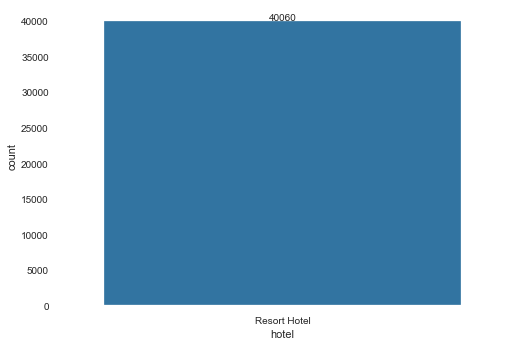

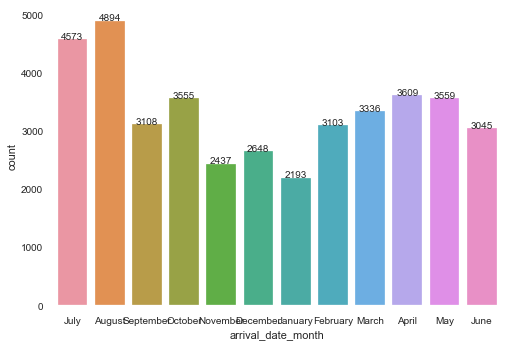

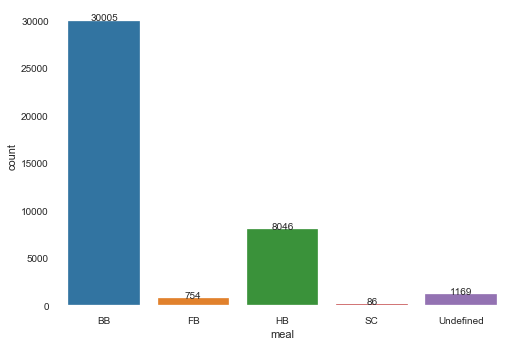

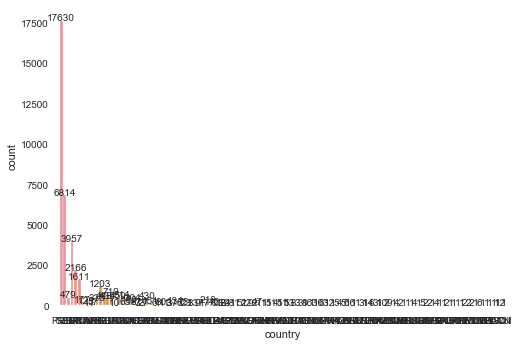

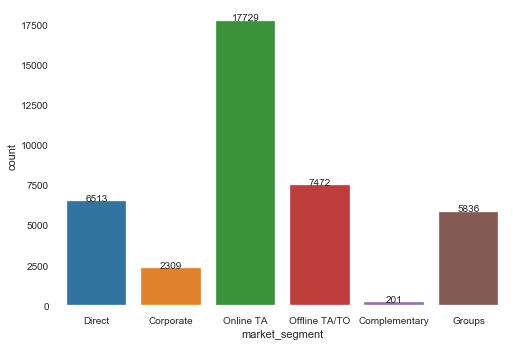

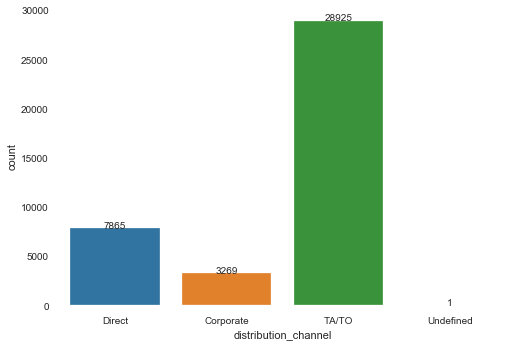

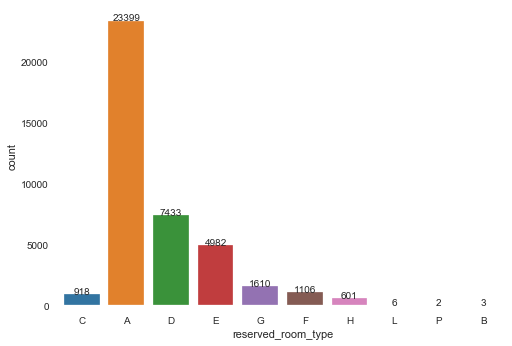

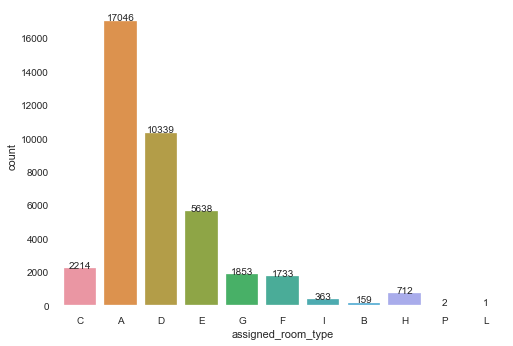

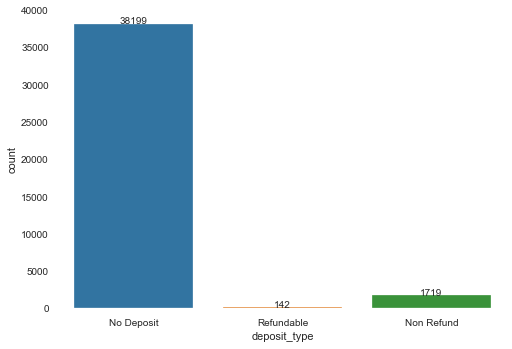

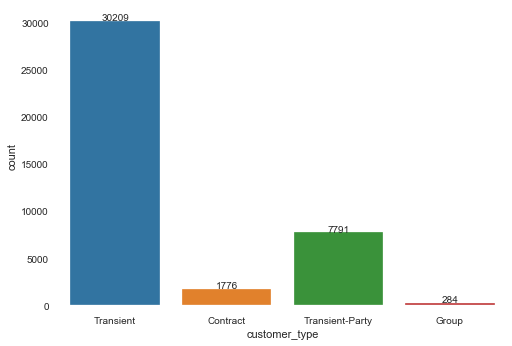

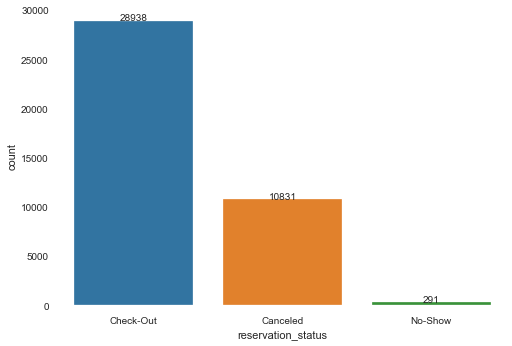

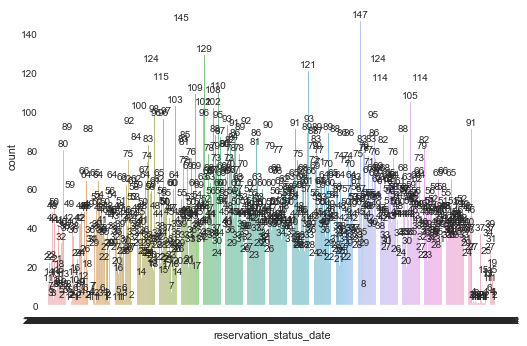

In [204]:
for i, col in enumerate(df_h1_cat.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/cat_h1/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_h1_cat)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))

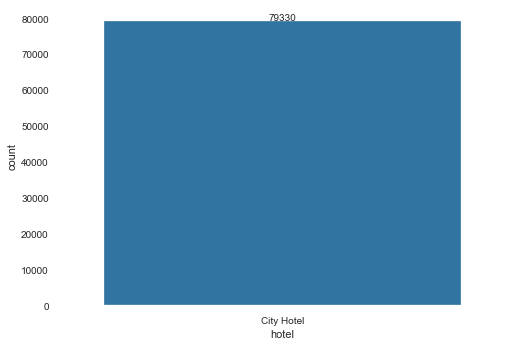

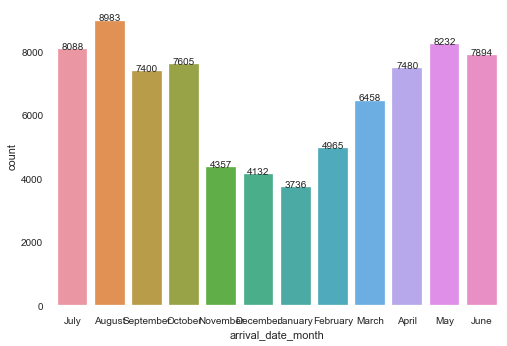

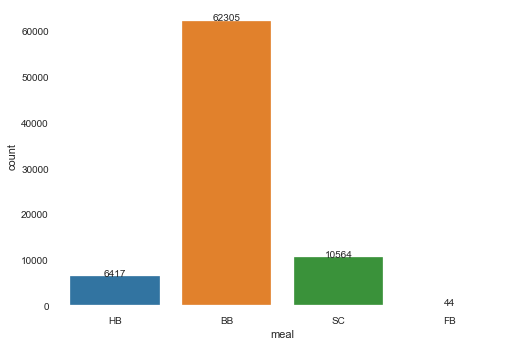

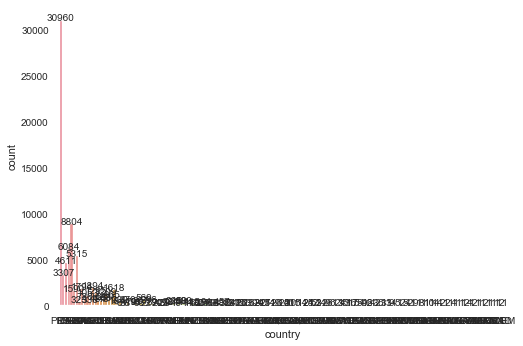

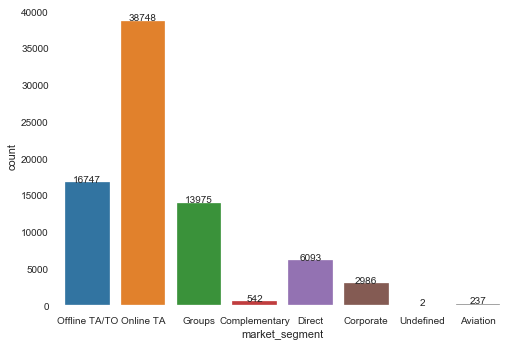

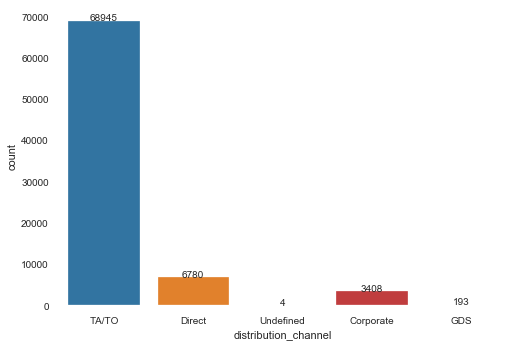

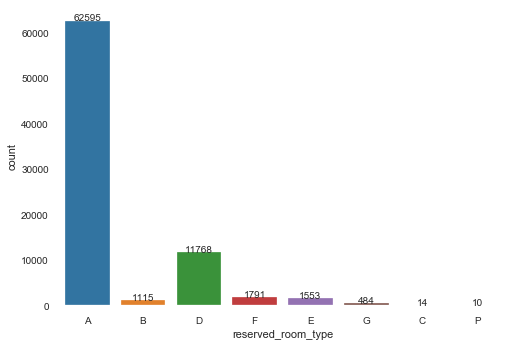

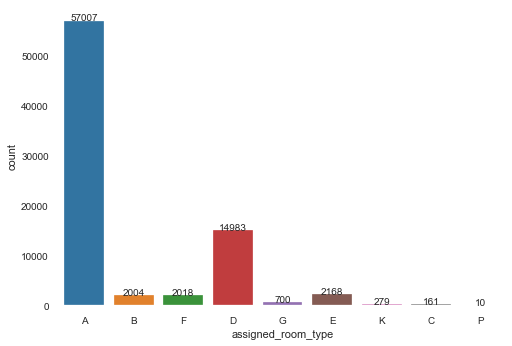

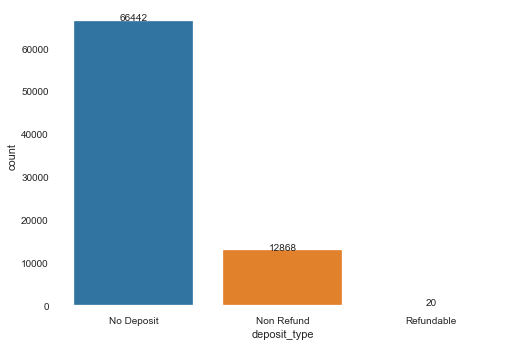

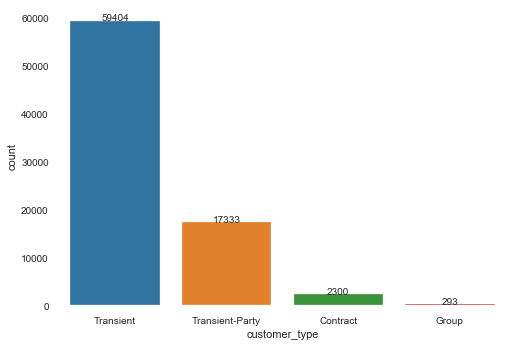

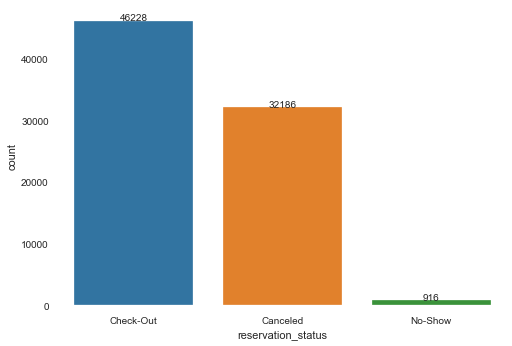

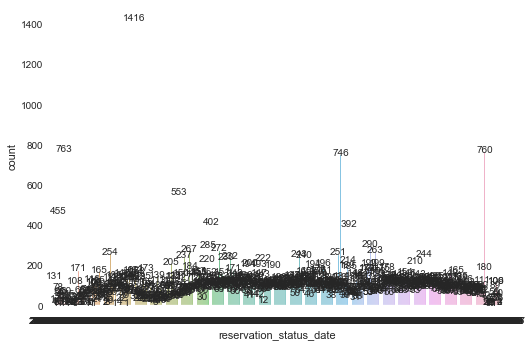

In [205]:
for i, col in enumerate(df_h2_cat.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/cat_h2/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_h2_cat)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))

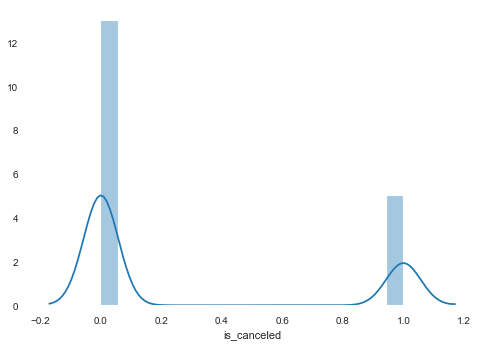

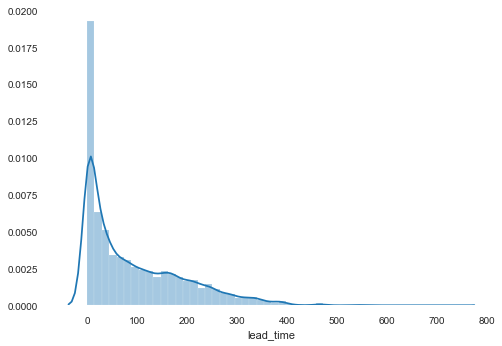

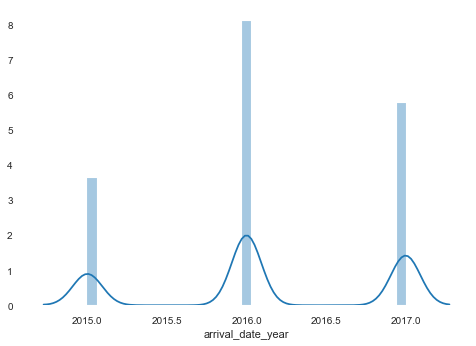

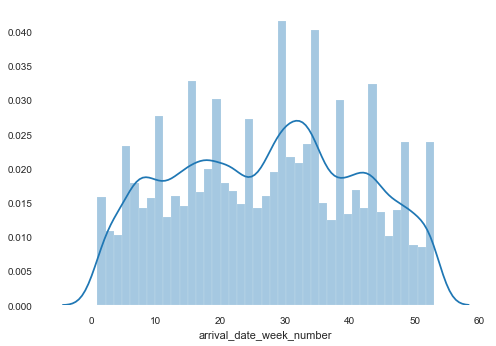

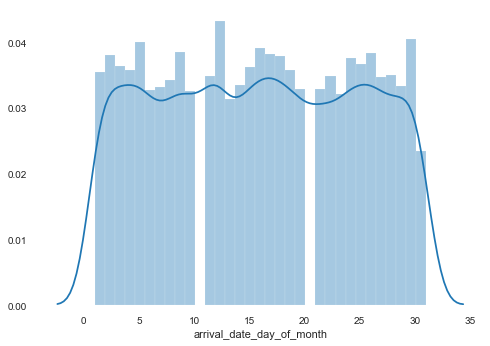

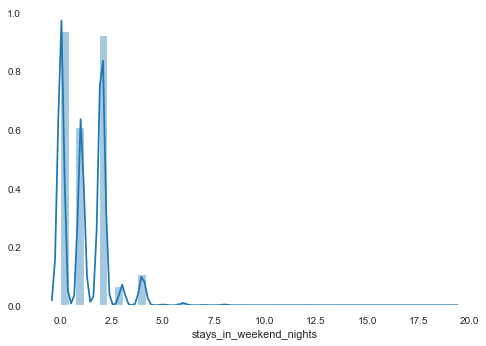

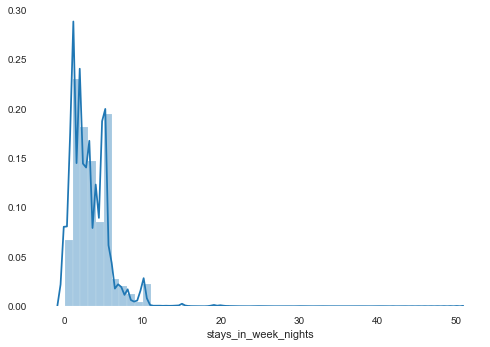

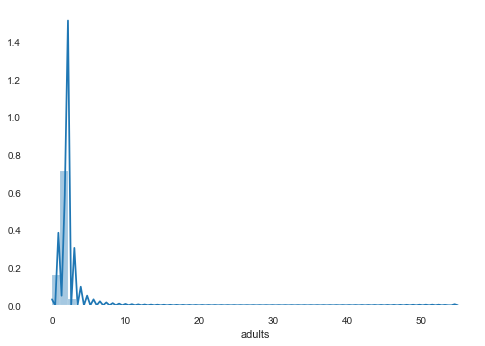

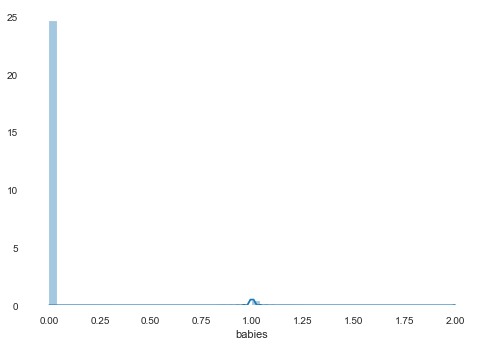

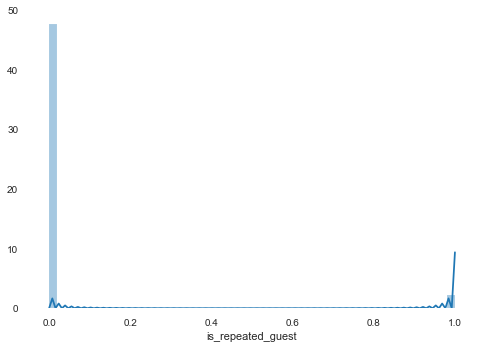

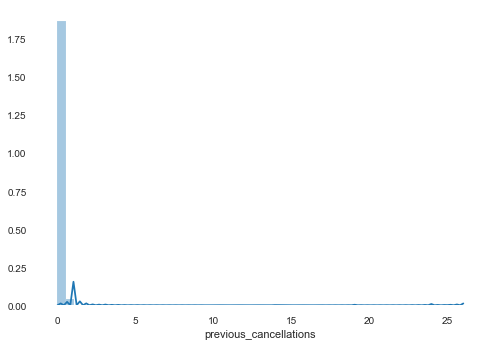

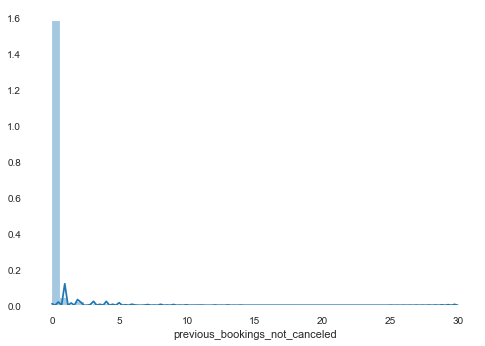

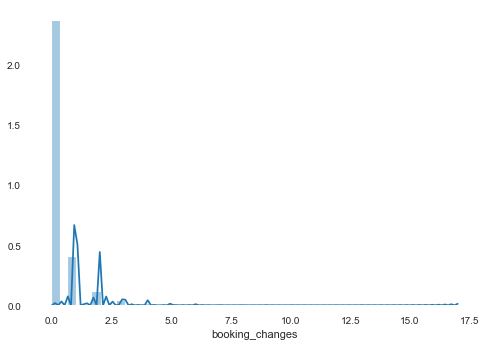

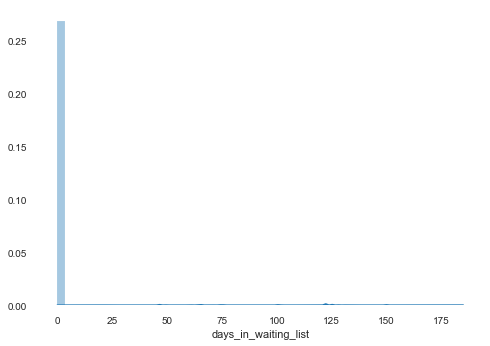

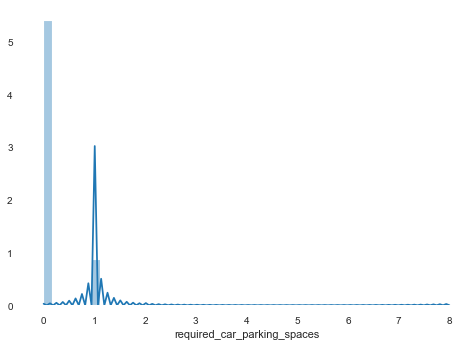

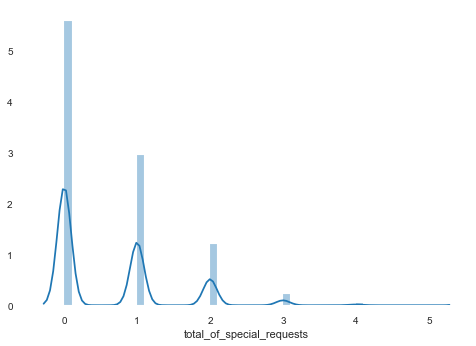

In [206]:
for i, col in enumerate(df_h1_num.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_h1/")
    #sns.countplot(x=col, data=df_cat)
    sns.distplot(df_h1_num[col])
    plt.savefig(path/(col+'.jpg'))

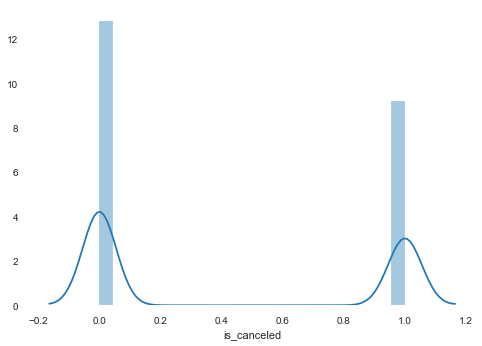

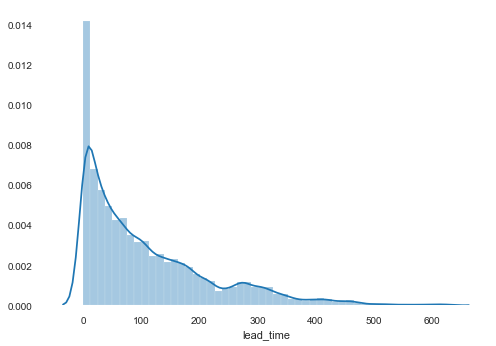

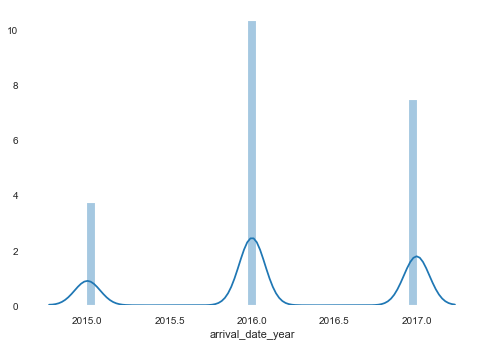

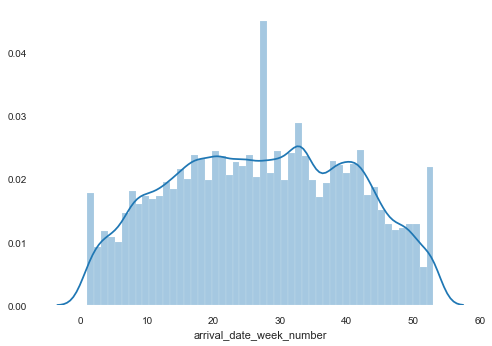

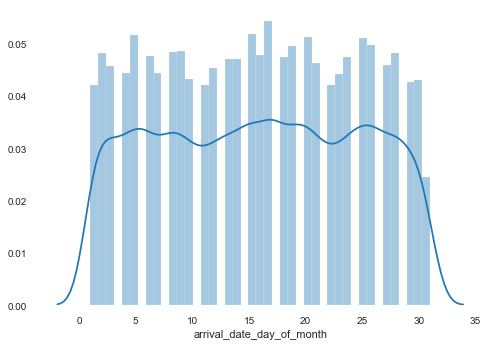

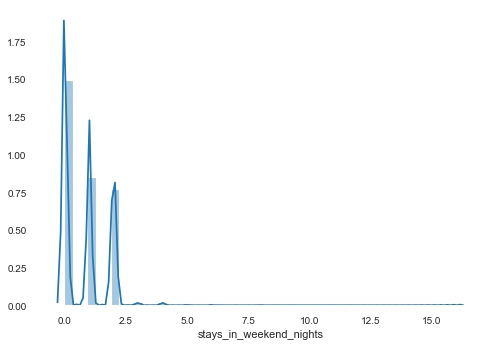

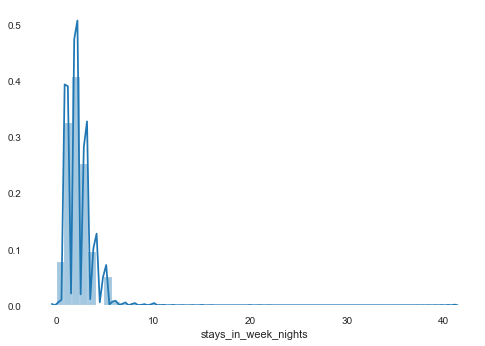

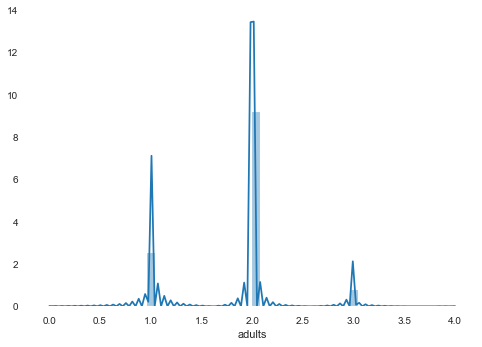

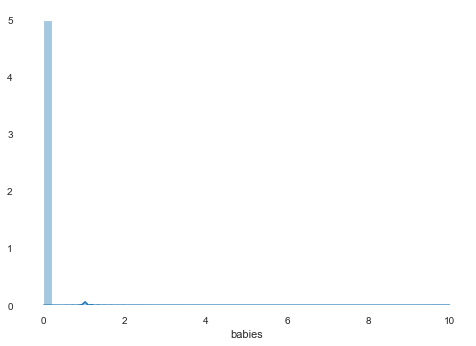

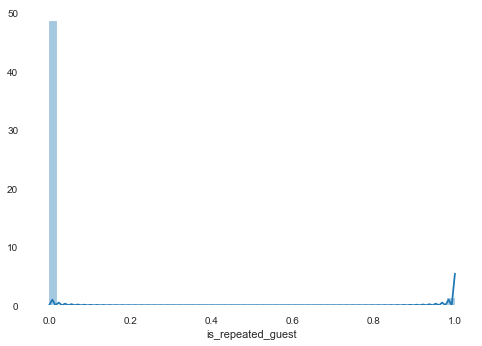

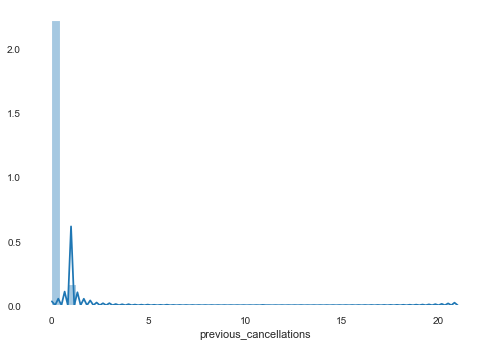

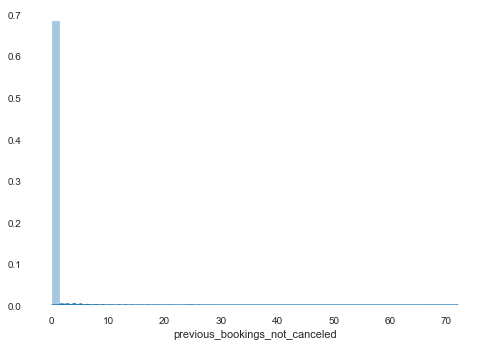

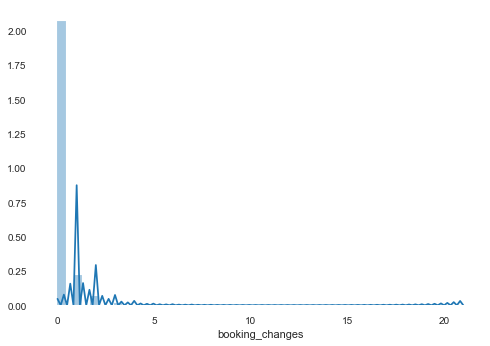

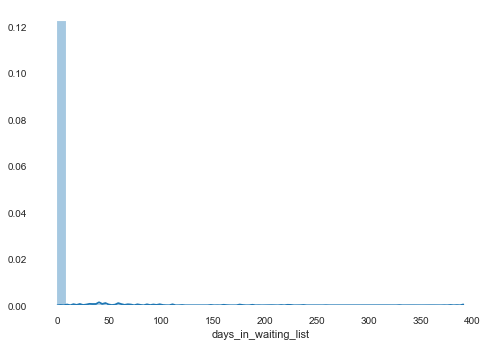

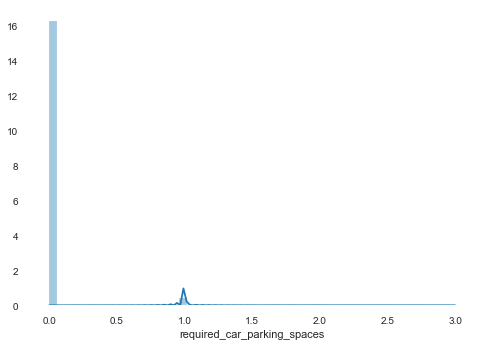

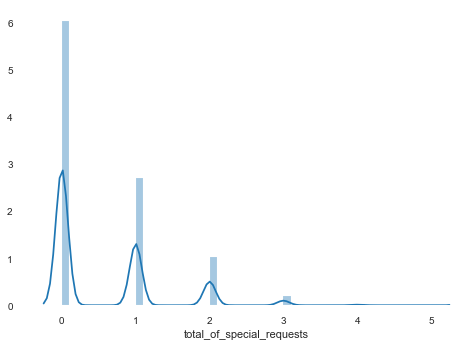

In [207]:
for i, col in enumerate(df_h2_num.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_h2/")
    #sns.countplot(x=col, data=df_cat)
    sns.distplot(df_h2_num[col])
    plt.savefig(path/(col+'.jpg'))

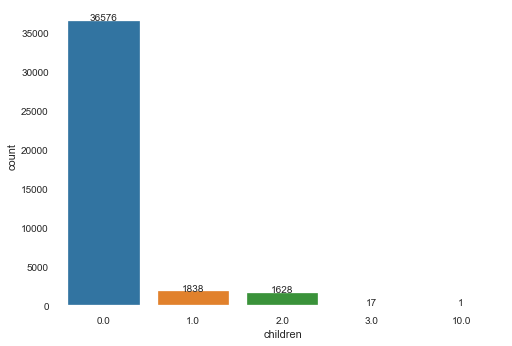

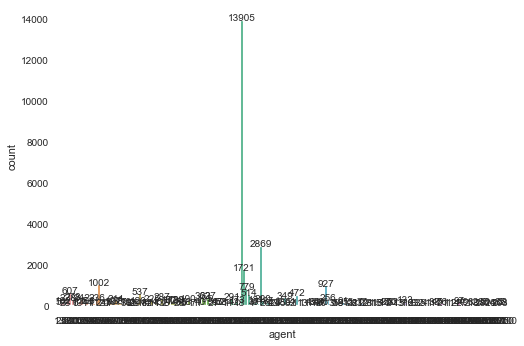

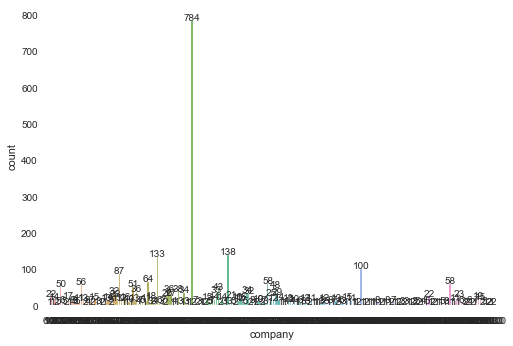

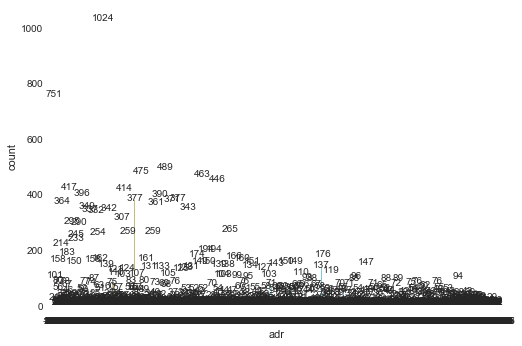

In [209]:
for i, col in enumerate(df_h1_float.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_h1/float/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_h1_float)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))

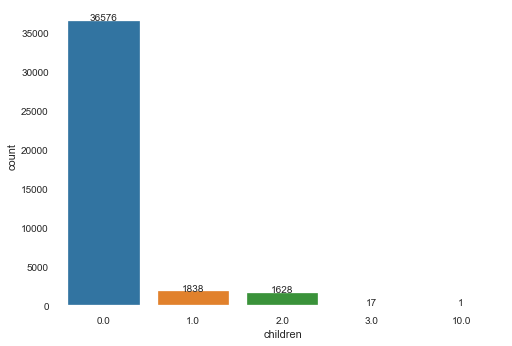

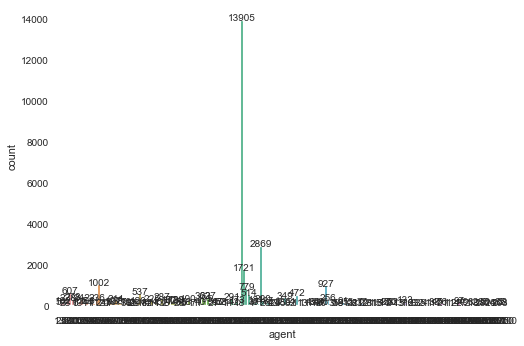

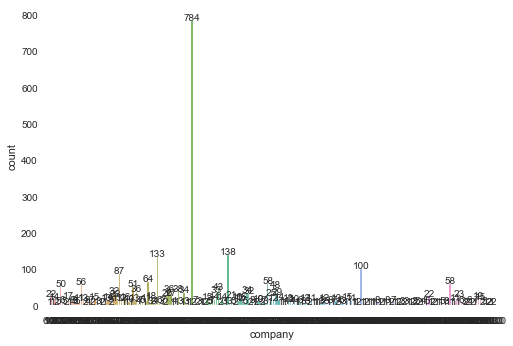

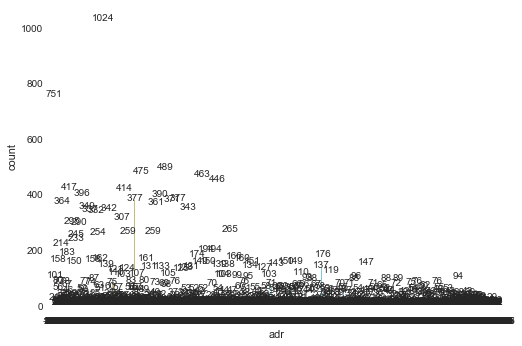

In [210]:
for i, col in enumerate(df_h2_float.columns):
    plt.figure(i)
    path = Path("C:/Users/admin/Desktop/great lakes course/Hotel_data/num_h2/float/")
    #sns.countplot(x=col, data=df_cat)
    ax = sns.countplot(x=col, data=df_h2_float)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
    plt.savefig(path/(col+'.jpg'))

In [19]:
df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
df_not_assign = df[df.reserved_room_type != df.assigned_room_type]

In [31]:
df_not_assign[['assigned_room_type','reserved_room_type']]

assigned_room_type reserved_room_type
2                       C                  A
12                      E                  D
15                      E                  D
17                      E                  A
18                      G                  A
...                   ...                ...
119273                  K                  A
119274                  K                  A
119289                  F                  E
119297                  F                  D
119357                  D                  A

[14917 rows x 2 columns]

In [33]:
df[df.previous_cancellations==1]

hotel  is_canceled  lead_time  arrival_date_year  \
13805   Resort Hotel            1          2               2016   
13811   Resort Hotel            1         71               2016   
13825   Resort Hotel            0          6               2016   
13826   Resort Hotel            0          7               2016   
13827   Resort Hotel            0          8               2016   
...              ...          ...        ...                ...   
111356    City Hotel            0         10               2017   
111357    City Hotel            0         20               2017   
111358    City Hotel            0          8               2017   
111359    City Hotel            0         13               2017   
111925    City Hotel            1          6               2017   

       arrival_date_month  arrival_date_week_number  \
13805             October                        42   
13811                July                        29   
13825               March                        13   
13826                June                        26   
13827           September                        40   
...                   ...                       ...   
111356               June                        25   
111357               July                        28   
111358               July                        30   
111359             August                        35   
111925               July                        29   

        arrival_date_day_of_month  stays_in_weekend_nights  \
13805                          12                        0   
13811                          14                        3   
13825                          21                        1   
13826                          21                        0   
13827                          27                        0   
...                           ...                      ...   
111356                         22                        0   
111357                         11                        0   
111358                         25                        0   
111359                         29                        0   
111925                         17                        1   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
13805                      2       1  ...    No Deposit    NaN    94.0   
13811                      8       2  ...    No Deposit    NaN     NaN   
13825                      0       1  ...    No Deposit    NaN    53.0   
13826                      1       1  ...    No Deposit    NaN    53.0   
13827                      2       2  ...    No Deposit    NaN    53.0   
...                      ...     ...  ...           ...    ...     ...   
111356                     1       1  ...    No Deposit    NaN   238.0   
111357                     3       1  ...    No Deposit    NaN   238.0   
111358                     1       1  ...    No Deposit    NaN   238.0   
111359                     1       1  ...    No Deposit    NaN   238.0   
111925                     0       1  ...    No Deposit    NaN   238.0   

       days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
13805                     0     Transient   37.0                            0   
13811                     0     Transient  126.6                            0   
13825                     0     Transient   40.0                            0   
13826                     0     Transient   65.0                            0   
13827                     0     Transient   65.0                            0   
...                     ...           ...    ...                          ...   
111356                    0     Transient   65.0                            0   
111357                    0     Transient   65.0                            0   
111358                    0     Transient   65.0                            1   
111359                    0     Transient   65.0                            0   
111925                  

In [34]:
df[df.is_repeated_guest==1]

hotel  is_canceled  lead_time  arrival_date_year  \
13937   Resort Hotel            0          6               2016   
14681   Resort Hotel            1        202               2015   
14777   Resort Hotel            1        187               2015   
14817   Resort Hotel            1        202               2015   
14823   Resort Hotel            1        173               2015   
...              ...          ...        ...                ...   
117701    City Hotel            0          0               2017   
117841    City Hotel            0          7               2017   
117961    City Hotel            0          0               2017   
118029    City Hotel            0          0               2017   
119070    City Hotel            0          0               2017   

       arrival_date_month  arrival_date_week_number  \
13937               April                        17   
14681                July                        30   
14777              August                        32   
14817           September                        36   
14823              August                        34   
...                   ...                       ...   
117701             August                        32   
117841             August                        35   
117961             August                        32   
118029             August                        33   
119070             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
13937                          20                        0   
14681                          22                        2   
14777                           4                        0   
14817                           1                        2   
14823                          16                        2   
...                           ...                      ...   
117701                          8                        0   
117841                         30                        0   
117961                         12                        0   
118029                         14                        0   
119070                         29                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
13937                      2       1  ...    No Deposit    5.0     NaN   
14681                      5       2  ...    No Deposit  156.0     NaN   
14777                      5       2  ...    No Deposit  240.0     NaN   
14817                      8       2  ...    No Deposit  156.0     NaN   
14823                      5       2  ...    No Deposit  250.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
117701                     0       2  ...    No Deposit  262.0     NaN   
117841                     2       1  ...    No Deposit    NaN    40.0   
117961                     1       2  ...    No Deposit   14.0     NaN   
118029                     0       2  ...    No Deposit    NaN     NaN   
119070                     1       2  ...    No Deposit  229.0     NaN   

       days_in_waiting_list customer_type     adr  \
13937                     0     Transient    0.00   
14681                     0      Contract   90.95   
14777                     0     Transient   66.00   
14817                     0      Contract   55.68   
14823                     0     Transient  130.90   
...                     ...           ...     ...   
117701                    0     Transient    0.00   
117841                    0     Transient   65.00   
117961                    0     Transient  240.00   
118029                    0     Transient    0.00   
119070                    0         Group  270.00   

        required_car_parking_spaces  total_of_special_requests  \
13937                             1                          0   
14681                             0                          0   
14777                             0                          2   
14817         

In [35]:
df[df.previous_bookings_not_canceled==1]

hotel  is_canceled  lead_time  arrival_date_year  \
13803   Resort Hotel            0          7               2016   
13808   Resort Hotel            0          6               2016   
13811   Resort Hotel            1         71               2016   
13813   Resort Hotel            0          1               2016   
13817   Resort Hotel            0          1               2017   
...              ...          ...        ...                ...   
117424    City Hotel            0          3               2017   
117841    City Hotel            0          7               2017   
118581    City Hotel            0         11               2017   
118651    City Hotel            0        189               2017   
118654    City Hotel            0        189               2017   

       arrival_date_month  arrival_date_week_number  \
13803             January                         3   
13808             January                         5   
13811                July                        29   
13813            February                         6   
13817            February                         8   
...                   ...                       ...   
117424             August                        35   
117841             August                        35   
118581             August                        34   
118651             August                        35   
118654             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
13803                          13                        0   
13808                          26                        0   
13811                          14                        3   
13813                           2                        0   
13817                          21                        0   
...                           ...                      ...   
117424                         31                        0   
117841                         30                        0   
118581                         25                        0   
118651                         27                        2   
118654                         27                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
13803                      2       1  ...    No Deposit   94.0     NaN   
13808                      2       1  ...    No Deposit   94.0     NaN   
13811                      8       2  ...    No Deposit    NaN     NaN   
13813                      2       1  ...    No Deposit    NaN    94.0   
13817                      2       1  ...    No Deposit   94.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
117424                     1       2  ...    No Deposit    NaN    40.0   
117841                     2       1  ...    No Deposit    NaN    40.0   
118581                     2       2  ...    No Deposit   98.0     NaN   
118651                     0       2  ...    No Deposit    9.0     NaN   
118654                     0       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list    customer_type    adr  \
13803                     0        Transient   27.0   
13808                     0        Transient   27.0   
13811                     0        Transient  126.6   
13813                     0        Transient   27.0   
13817                     0  Transient-Party   35.0   
...                     ...              ...    ...   
117424                    0        Transient   95.0   
117841                    0        Transient   65.0   
118581                    0            Group  125.0   
118651                    0  Transient-Party  119.0   
118654                    0        Transient  119.0   

        required_car_parking_spaces  total_of_special_requests  \
13803                             0                          0   
13808                             0                          0   
13811                             0                     

In [40]:
df.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [41]:
date = df[['arrival_date_year',
'arrival_date_month',
'arrival_date_week_number',
'arrival_date_day_of_month']]

In [46]:
date.head()

arrival_date_year arrival_date_month  arrival_date_week_number  \
0               2015               July                        27   
1               2015               July                        27   
2               2015               July                        27   
3               2015               July                        27   
4               2015               July                        27   

   arrival_date_day_of_month  date_format  
0                          1       2020.5  
1                          1       2020.5  
2                          1       2020.5  
3                          1       2020.5  
4                          1       2020.5